## Data Science Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

0. Environment.
1. Check libraries version.
2. Import Libraries.
3. Question or problem definition.
4. Acquire dataset or training and testing data.
5. Analyze, identify patterns, and explore the data.

6. Wrangle, prepare, cleanse the data.
7. **Feature Engineering**
8. Model, predict and solve the problem.
9. Visualize, report, and present the problem solving steps and final solution.
10. Create or solve AI pipeline on Cloud, architecture solution and shows results.

Could be to exist another substeps during Data Processing and Data Modeling, for to train and deploy many machine learning and/or deep learning combination pipelines.

***

## Feature Engineering


***

## 5.3 New Features and new variables

`Feature engineering` is about creating new input features from your existing ones.

In general, you can think of data cleaning as a process of subtraction and feature engineering as a process of addition.

This is often one of the most valuable tasks a data science area can do to improve model performance, for 3 big reasons:

- we can isolate and highlight key information, which helps your algorithms "focus" on what’s important.
- we can bring in your own domain expertise.
- most importantly, once you understand the "vocabulary" of feature engineering, you can bring in other people’s domain expertise!

Main tasks are :

* 1. combine sparse classes
* 2. add dummy variables
* 3. remove unused features

In [1]:
# Check the versions of libraries on Win10

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


***

## Import Libraries and modules

We create grouping for different libraries and modules per workflow block or step.

In [2]:
#!pip install sklearn_pandas

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, log_loss

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***

## Load dataset

Only if we use different way to load dataset from cloud storage, google drive or locally, we develop different chunks or API connection.

In [4]:
# Load first and second dataset saved before.
data_1 = pd.read_csv("df2b_1.csv", index_col=False)
data_2 = pd.read_csv("df2b_2.csv", index_col=False)
dataset = [data_1, data_2]

In [5]:
data_1.head(10)

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,ADSL,3G Devices,Type of House,new_PhoneCallDay,House Price_imp,Income_imp,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp
0,1,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,...,0.0,1.0,Urban,Wednesday,439134.274215,55407.736314,15345.3798,76897.09528,35147.05566,0.000
1,2,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thursday,...,1.0,1.0,Rustic,Thursday,103235.979015,27854.157114,3485.5758,18037.38088,8133.08226,0.000
2,3,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thursday,...,1.0,0.0,Urban,Thursday,398515.957515,108942.578514,13911.2298,69779.49768,31880.39706,98010.783
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,1.0,1.0,Urban,Wednesday,231849.048015,63173.280114,8026.6158,40574.30488,18476.52126,0.000
4,5,0,MOBILE PHONE,0,1992,2,0,0,14.50,Wednesday,...,1.0,1.0,Urban,Wednesday,151410.319515,27635.458914,5293.5498,179130.14408,9271.25046,0.000
5,6,1,MOBILE PHONE,1,2009,6,2,2,14.50,Thursday,...,1.0,1.0,Urban,Thursday,89707.573215,56902.562514,15124.1778,25439.64808,19317.02946,0.000
6,7,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Tuesday,...,0.0,0.0,Rustic,Tuesday,133550.924715,36179.103114,4555.9278,23349.46248,10571.08986,0.000
7,8,0,FIXED / LAND PHONE,0,1995,2,0,0,14.50,Friday,...,1.0,1.0,Urban,Friday,110210.115015,23966.943714,10850.0058,12595.69448,22494.51306,47011.968
8,9,0,FIXED / LAND PHONE,0,2011,2,0,0,14.50,Thursday,...,0.0,0.0,Urban,Thursday,169473.926115,151993.288314,3915.7218,27493.76088,44675.64426,48323.277
9,10,0,MOBILE PHONE,0,2009,2,0,0,14.50,Sunday,...,1.0,0.0,Urban,Sunday,148633.441515,40321.000314,11896.5978,25992.37128,11784.06666,0.000


In [6]:
data_2.head(10)

,Obs,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,Province,...,Number of Fixed Lines,ADSL,3G Devices,Type of House,House Price_imp,Income_imp,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp
0,1,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,OU,...,1.0,1.0,0.0,Urban,230139.624195,62842.06971,8010.6894,40289.464296,18386.272962,56033.07732
1,2,FIXED / LAND PHONE,0,2012,2,0,0,1957.0,Medium,VA,...,0.0,0.0,1.0,Urban,119859.179895,21367.73331,2678.2794,13824.893096,6240.219762,0.00000
2,3,FIXED / LAND PHONE,0,2011,6,0,1,1952.0,Low,BU,...,0.0,0.0,0.0,Urban,425006.996895,116355.65571,14891.0094,74436.255496,34058.121162,66860.13132
3,4,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,VA,...,1.0,0.0,0.0,Urban,379527.587595,103866.30891,13285.2294,66466.846696,30400.519362,428621.27832
4,5,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,GR,...,1.0,0.0,1.0,Urban,243853.240995,31065.03351,4117.1994,25338.762696,16838.809962,0.00000
5,6,MOBILE PHONE,1,2011,6,0,1,1972.0,Medium,BA,...,2.0,1.0,1.0,Urban,184256.436195,50241.84291,6390.6534,32249.357096,14696.223762,0.00000
6,7,FIXED / LAND PHONE,0,2012,2,0,0,1964.0,Low,MA,...,0.0,1.0,0.0,Urban,639019.828395,175126.86891,22447.3014,111937.870696,51269.683362,0.00000
7,8,FIXED / LAND PHONE,0,2012,2,0,0,1965.0,Low,CO,...,2.0,1.0,0.0,Rustic,88411.849695,23921.45091,3006.6174,15454.440296,6988.108962,0.00000
8,9,FIXED / LAND PHONE,0,1998,26,0,3,1949.0,Medium,SE,...,1.0,1.0,0.0,Urban,116848.126395,31730.48991,4010.6214,20437.310696,9275.023362,0.00000
9,10,MOBILE PHONE,0,2013,2,0,0,1971.0,High,CA,...,0.0,1.0,0.0,Urban,324933.632595,24268.36671,3051.2214,15675.808296,7089.706962,0.00000


***

## Missing values and Imputation - stage 3

All variables with more >70% of missing values are dropped. We impute the other ones.

In [7]:
# Check null and NA values for both dataset by frequency first and absolute values after
for i in dataset:
    lista = []
    lista.append(i.isna().sum()/len(i)*100)
    print(lista)
    print("*-"*20)

[Obs                                 0.000
Sales                               0.000
PhoneType                           0.000
Email                               0.000
Tenure                              0.000
NumberofCampaigns                   0.000
ProdActive                          0.000
ProdBought                          0.000
Premium Offered                     0.000
Phone Call Day                      0.000
CodeCategory                        0.000
Birthdate                           0.000
Product Type                        0.000
Number of Semesters Paid            0.000
Socieconomic Status                 0.000
Province                            0.000
Right Address                       0.000
Living Area (m^2)                   0.000
House Price                        25.700
Income                             25.700
yearBuilt                           0.000
House Insurance                    25.700
Pension Plan                       25.700
Estimated number of cars         

## Check missing values
Create, transform and adapt at the model some variables

In [8]:
# Create a function to detect and shows missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [9]:
# Check missing values for dataset0
missing_zero_values_table(dataset[0])

Your selected dataframe has 39 columns and 20000 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64
Pension Plan,0,5140,25.7,5140,25.7,float64
Credit,0,5140,25.7,5140,25.7,float64


In [10]:
# Check missing values for dataset_1
missing_zero_values_table(dataset[1])

Your selected dataframe has 32 columns and 10000 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
House Price,0,2170,21.7,2170,21.7,float64
Income,0,2169,21.7,2169,21.7,float64
House Insurance,0,2169,21.7,2169,21.7,float64
Pension Plan,0,2169,21.7,2169,21.7,float64
Credit,0,2169,21.7,2169,21.7,float64
Savings,4071,2169,21.7,6240,62.4,float64


In [11]:
# Keep only variables with null values first dataset
miss_cols_df0 = [col for col in dataset[0].columns if dataset[0][col].isnull().any()]
miss_cols_df0

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

## Combine sparse classes

In [12]:
dataset[0].head(10)

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,ADSL,3G Devices,Type of House,new_PhoneCallDay,House Price_imp,Income_imp,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp
0,1,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,...,0.0,1.0,Urban,Wednesday,439134.274215,55407.736314,15345.3798,76897.09528,35147.05566,0.000
1,2,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thursday,...,1.0,1.0,Rustic,Thursday,103235.979015,27854.157114,3485.5758,18037.38088,8133.08226,0.000
2,3,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thursday,...,1.0,0.0,Urban,Thursday,398515.957515,108942.578514,13911.2298,69779.49768,31880.39706,98010.783
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,1.0,1.0,Urban,Wednesday,231849.048015,63173.280114,8026.6158,40574.30488,18476.52126,0.000
4,5,0,MOBILE PHONE,0,1992,2,0,0,14.50,Wednesday,...,1.0,1.0,Urban,Wednesday,151410.319515,27635.458914,5293.5498,179130.14408,9271.25046,0.000
5,6,1,MOBILE PHONE,1,2009,6,2,2,14.50,Thursday,...,1.0,1.0,Urban,Thursday,89707.573215,56902.562514,15124.1778,25439.64808,19317.02946,0.000
6,7,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Tuesday,...,0.0,0.0,Rustic,Tuesday,133550.924715,36179.103114,4555.9278,23349.46248,10571.08986,0.000
7,8,0,FIXED / LAND PHONE,0,1995,2,0,0,14.50,Friday,...,1.0,1.0,Urban,Friday,110210.115015,23966.943714,10850.0058,12595.69448,22494.51306,47011.968
8,9,0,FIXED / LAND PHONE,0,2011,2,0,0,14.50,Thursday,...,0.0,0.0,Urban,Thursday,169473.926115,151993.288314,3915.7218,27493.76088,44675.64426,48323.277
9,10,0,MOBILE PHONE,0,2009,2,0,0,14.50,Sunday,...,1.0,0.0,Urban,Sunday,148633.441515,40321.000314,11896.5978,25992.37128,11784.06666,0.000


> `tenure`, `birthdate`, `yearBuilt` are in year format date and we grouped in few classes.

### Combine `Tenure`

In [13]:
dataset[0]['Tenure'].dtypes

dtype('int64')

In [14]:
2020 - dataset[0]['Tenure']

0         8
1         9
2        28
3         9
4        28
         ..
19995     7
19996     7
19997    11
19998     8
19999     8
Name: Tenure, Length: 20000, dtype: int64

In [15]:
years = pd.to_datetime('now').year - dataset[0]['Tenure']

In [16]:
dataset[0]['tenureYrs'] = years
dataset[1]['tenureYrs'] = pd.to_datetime('now').year - dataset[1]['Tenure']

In [17]:
dataset[0]

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,3G Devices,Type of House,new_PhoneCallDay,House Price_imp,Income_imp,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp,tenureYrs
0,1,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,...,1.0,Urban,Wednesday,439134.274215,55407.736314,15345.3798,76897.09528,35147.05566,0.000,8
1,2,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thursday,...,1.0,Rustic,Thursday,103235.979015,27854.157114,3485.5758,18037.38088,8133.08226,0.000,9
2,3,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thursday,...,0.0,Urban,Thursday,398515.957515,108942.578514,13911.2298,69779.49768,31880.39706,98010.783,28
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,1.0,Urban,Wednesday,231849.048015,63173.280114,8026.6158,40574.30488,18476.52126,0.000,9
4,5,0,MOBILE PHONE,0,1992,2,0,0,14.50,Wednesday,...,1.0,Urban,Wednesday,151410.319515,27635.458914,5293.5498,179130.14408,9271.25046,0.000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Thursday,...,0.0,Rustic,Thursday,181411.869015,49322.465514,5225.8878,31736.20088,14420.22726,44352.684,7
19996,19997,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Friday,...,0.0,Urban,Friday,124193.568915,33609.433914,2453.1678,21709.78488,9818.55126,0.000,7
19997,19998,0,FIXED / LAND PHONE,0,2009,4,0,1,14.50,Monday,...,1.0,Urban,Monday,189604.431315,51572.258514,6535.0458,33171.76968,15079.08906,46377.495,11
19998,19999,0,FIXED / LAND PHONE,0,2012,4,0,0,14.50,Monday,...,0.0,Urban,Monday,384516.228915,105098.041314,13416.9318,67326.33288,30754.50426,94550.706,8


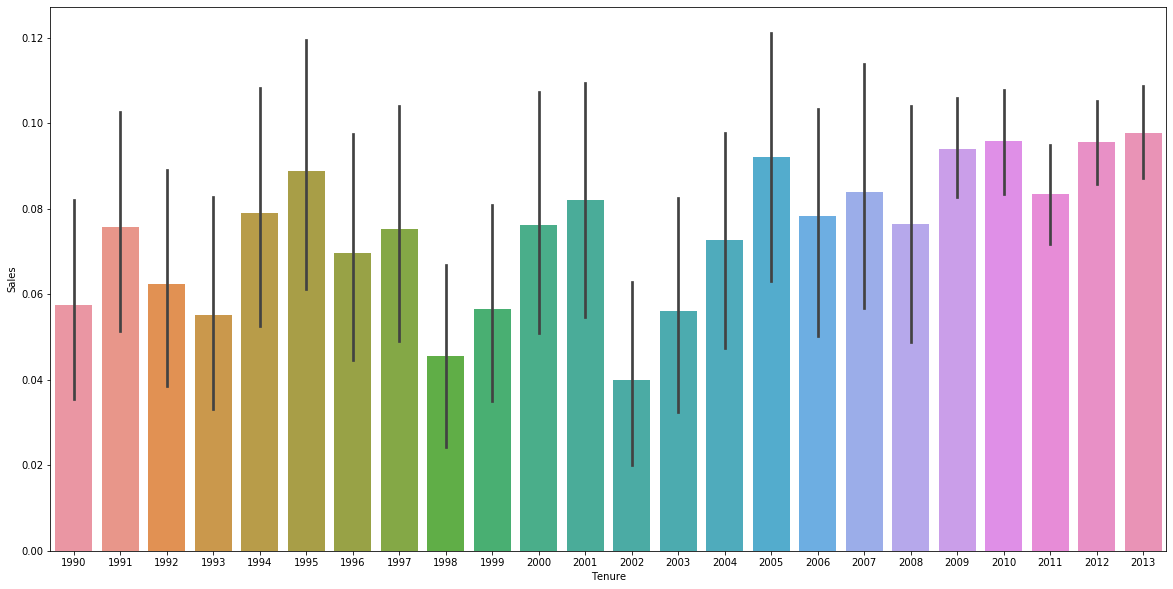

In [18]:
# Plot the distribution Tenure and Score
plt.figure(figsize= [20, 10])
sns.barplot(x="Tenure", y="Sales", data=dataset[0])
plt.show()

In [19]:
# Count unique values
print("Tenure feature have {} unique values".format(dataset[0]['Tenure'].nunique()))

Tenure feature have 24 unique values


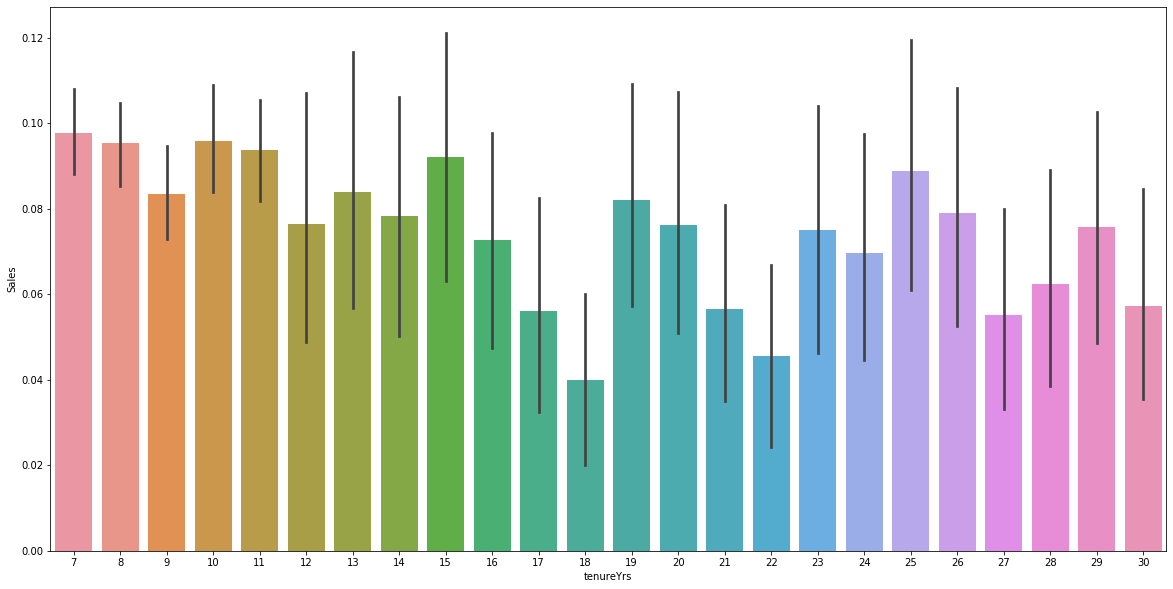

In [20]:
# Plot the distribution new feature tenure_yrs and Score
plt.figure(figsize= [20, 10])
sns.barplot(x="tenureYrs", y="Sales", data=dataset[0])
plt.show()

In [21]:
# Count unique values
print("TenureYrs feature have {} unique values".format(dataset[0]['tenureYrs'].nunique()))

TenureYrs feature have 24 unique values


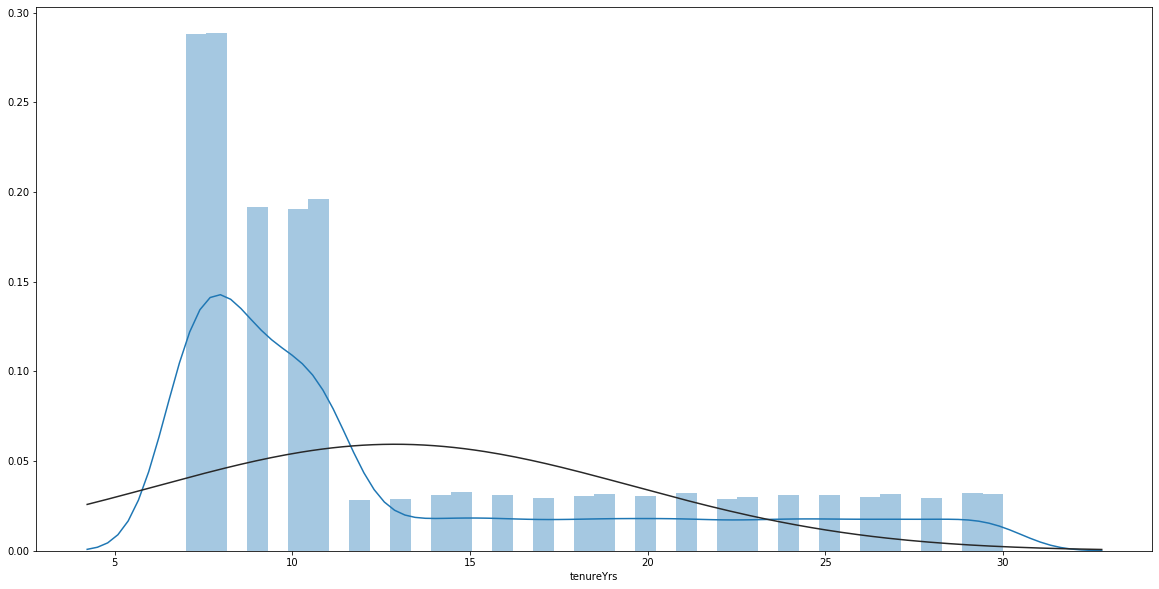

In [22]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['tenureYrs'], fit=norm)

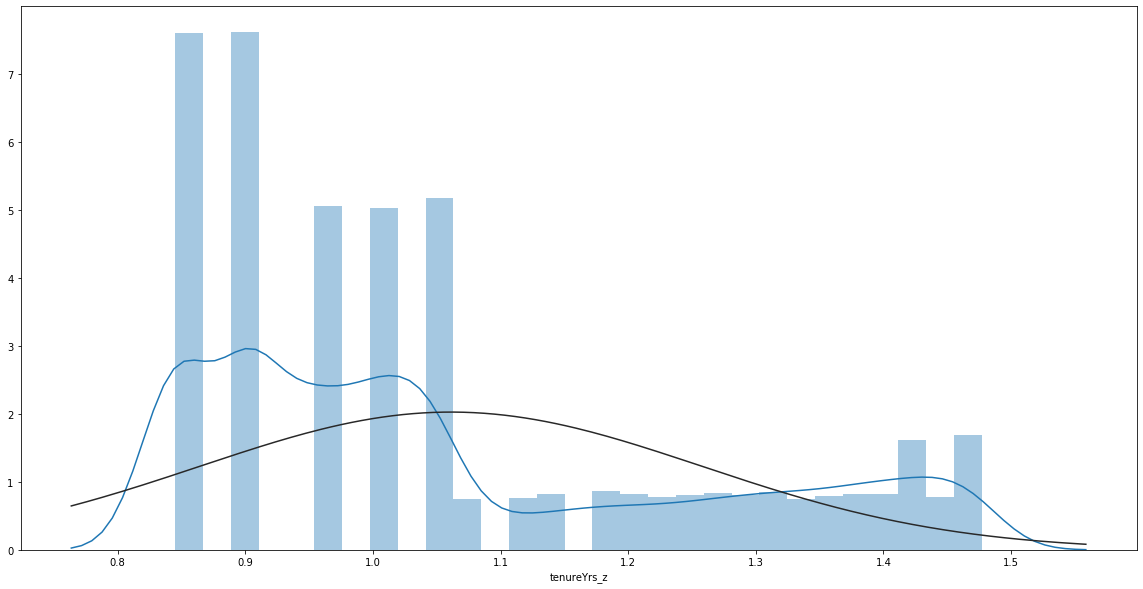

In [23]:
# Normalization
dataset[0]['tenureYrs_z'] = np.log10(dataset[0]['tenureYrs'])
dataset[1]['tenureYrs_z'] = np.log10(dataset[1]['tenureYrs'])
# Plot the distribution
tenureYrs_z = dataset[0]['tenureYrs_z']
plt.figure(figsize= [20, 10])
sns.distplot(tenureYrs_z, fit=norm)

In [24]:
# grouped in 5 bins
bins = [5, 10, 15, 20, 25, np.inf]
labels = ['up_10yrs', '10-15yrs', '15-20yrs', '20-25yrs', '>25yrs']
dataset[0]['tenureGrp'] = pd.cut(dataset[0]["tenureYrs"], bins, labels = labels)
dataset[1]['tenureGrp'] = pd.cut(dataset[0]["tenureYrs"], bins, labels = labels)

In [25]:
dataset[0]['tenureGrp']

0        up_10yrs
1        up_10yrs
2          >25yrs
3        up_10yrs
4          >25yrs
           ...   
19995    up_10yrs
19996    up_10yrs
19997    10-15yrs
19998    up_10yrs
19999    up_10yrs
Name: tenureGrp, Length: 20000, dtype: category
Categories (5, object): [up_10yrs < 10-15yrs < 15-20yrs < 20-25yrs < >25yrs]

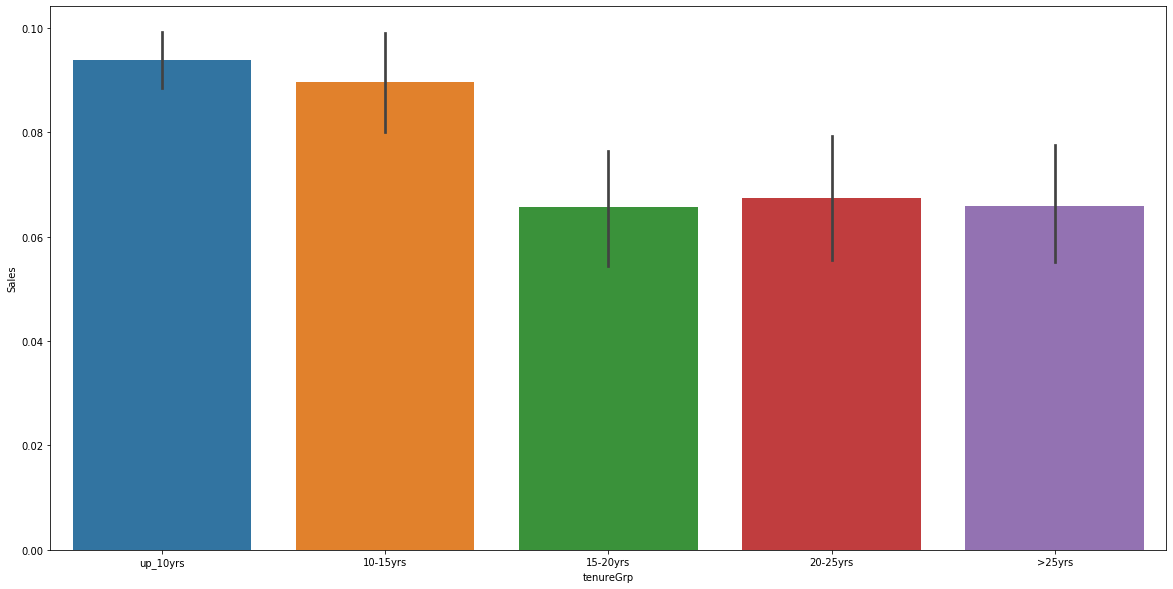

In [26]:
# Plot the distribution new feature tenure_yrs and Score
plt.figure(figsize= [20, 10])
sns.barplot(x="tenureGrp", y="Sales", data=dataset[0])
plt.show()

In [27]:
# Count unique values
print("TenureGroup feature have {} unique values".format(dataset[0]['tenureGrp'].nunique()))

TenureGroup feature have 5 unique values


In [28]:
# Check the results
pd.crosstab(dataset[0]['tenureGrp'], dataset[0]['Sales'])

Sales,0,1
tenureGrp,,
up_10yrs,9997,1035
10-15yrs,3330,328
15-20yrs,1651,116
20-25yrs,1646,119
>25yrs,1661,117


### Combine `Birthdate`

In [29]:
dataset[0]['Birthdate'].dtypes

dtype('float64')

In [30]:
2020 - dataset[0]['Birthdate']

0        45.0
1        59.0
2        70.0
3        58.0
4        51.0
         ... 
19995    70.0
19996    37.0
19997    55.0
19998    53.0
19999    61.0
Name: Birthdate, Length: 20000, dtype: float64

In [31]:
years = pd.to_datetime('now').year - dataset[0]['Birthdate']

In [32]:
dataset[0]['ageYrs'] = years
dataset[1]['ageYrs'] = pd.to_datetime('now').year - dataset[1]['Birthdate']

In [33]:
dataset[0]

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,House Price_imp,Income_imp,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp,tenureYrs,tenureYrs_z,tenureGrp,ageYrs
0,1,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,...,439134.274215,55407.736314,15345.3798,76897.09528,35147.05566,0.000,8,0.903090,up_10yrs,45.0
1,2,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thursday,...,103235.979015,27854.157114,3485.5758,18037.38088,8133.08226,0.000,9,0.954243,up_10yrs,59.0
2,3,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thursday,...,398515.957515,108942.578514,13911.2298,69779.49768,31880.39706,98010.783,28,1.447158,>25yrs,70.0
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,231849.048015,63173.280114,8026.6158,40574.30488,18476.52126,0.000,9,0.954243,up_10yrs,58.0
4,5,0,MOBILE PHONE,0,1992,2,0,0,14.50,Wednesday,...,151410.319515,27635.458914,5293.5498,179130.14408,9271.25046,0.000,28,1.447158,>25yrs,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Thursday,...,181411.869015,49322.465514,5225.8878,31736.20088,14420.22726,44352.684,7,0.845098,up_10yrs,70.0
19996,19997,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Friday,...,124193.568915,33609.433914,2453.1678,21709.78488,9818.55126,0.000,7,0.845098,up_10yrs,37.0
19997,19998,0,FIXED / LAND PHONE,0,2009,4,0,1,14.50,Monday,...,189604.431315,51572.258514,6535.0458,33171.76968,15079.08906,46377.495,11,1.041393,10-15yrs,55.0
19998,19999,0,FIXED / LAND PHONE,0,2012,4,0,0,14.50,Monday,...,384516.228915,105098.041314,13416.9318,67326.33288,30754.50426,94550.706,8,0.903090,up_10yrs,53.0


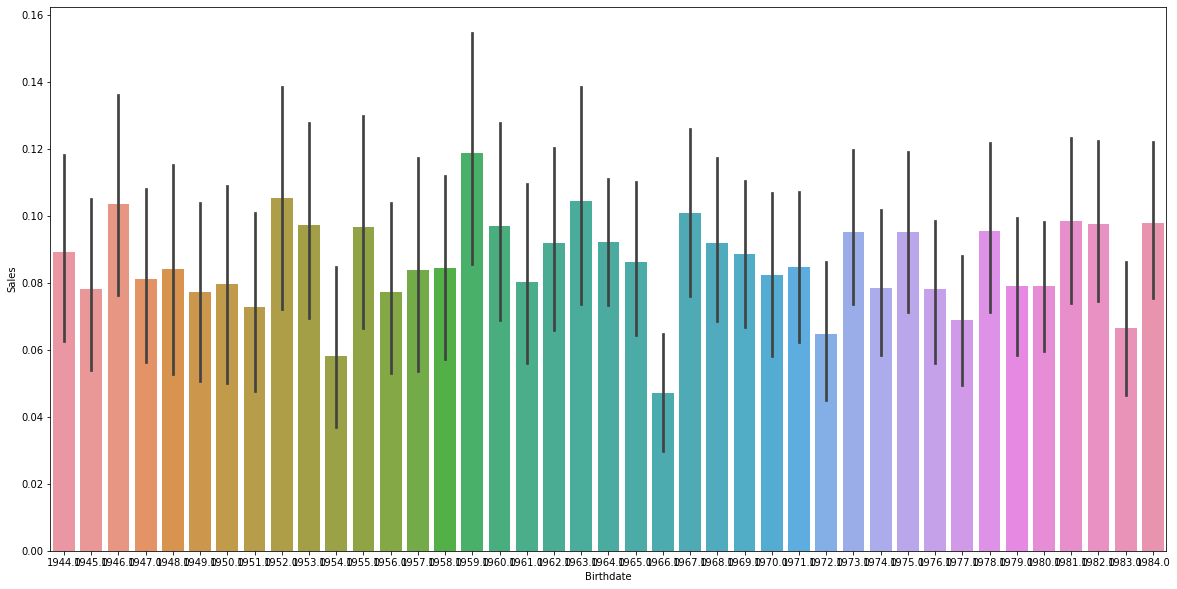

In [34]:
# Plot the distribution Tenure and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="Birthdate", y="Sales", data=dataset[0])
plt.show()

In [35]:
# Count unique values
print("Birthdate feature have {} unique values".format(dataset[0]['Birthdate'].nunique()))

Birthdate feature have 41 unique values


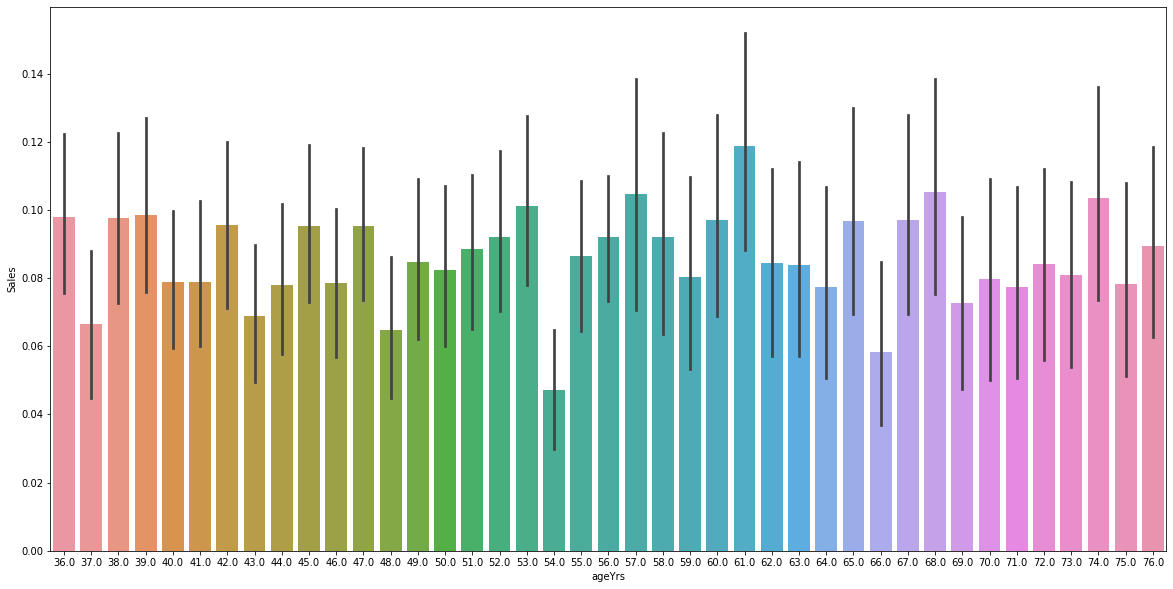

In [36]:
# Plot the distribution new feature tenure_yrs and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="ageYrs", y="Sales", data=dataset[0])
plt.show()

In [37]:
# Count unique values
print("Birthdate feature have {} unique values".format(dataset[0]['ageYrs'].nunique()))

Birthdate feature have 41 unique values


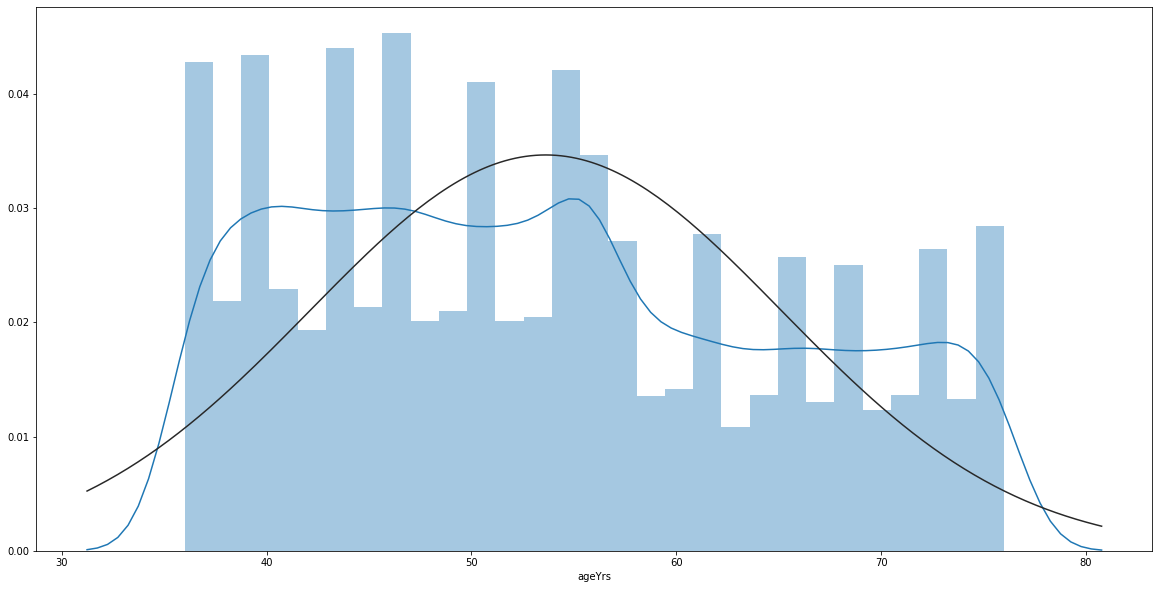

In [38]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['ageYrs'], fit=norm)

In [39]:
# grouped in 5 bins
bins = [0, 40, 55, 65, 75, np.inf]
labels = ['up_40yrs', '40-55yrs', '55-65yrs', '65-75yrs', '>75yrs']
dataset[0]['ageGrp'] = pd.cut(dataset[0]["ageYrs"], bins, labels = labels)
dataset[1]['ageGrp'] = pd.cut(dataset[1]["ageYrs"], bins, labels = labels)

In [40]:
dataset[0]['ageGrp']

0        40-55yrs
1        55-65yrs
2        65-75yrs
3        55-65yrs
4        40-55yrs
           ...   
19995    65-75yrs
19996    up_40yrs
19997    40-55yrs
19998    40-55yrs
19999    55-65yrs
Name: ageGrp, Length: 20000, dtype: category
Categories (5, object): [up_40yrs < 40-55yrs < 55-65yrs < 65-75yrs < >75yrs]

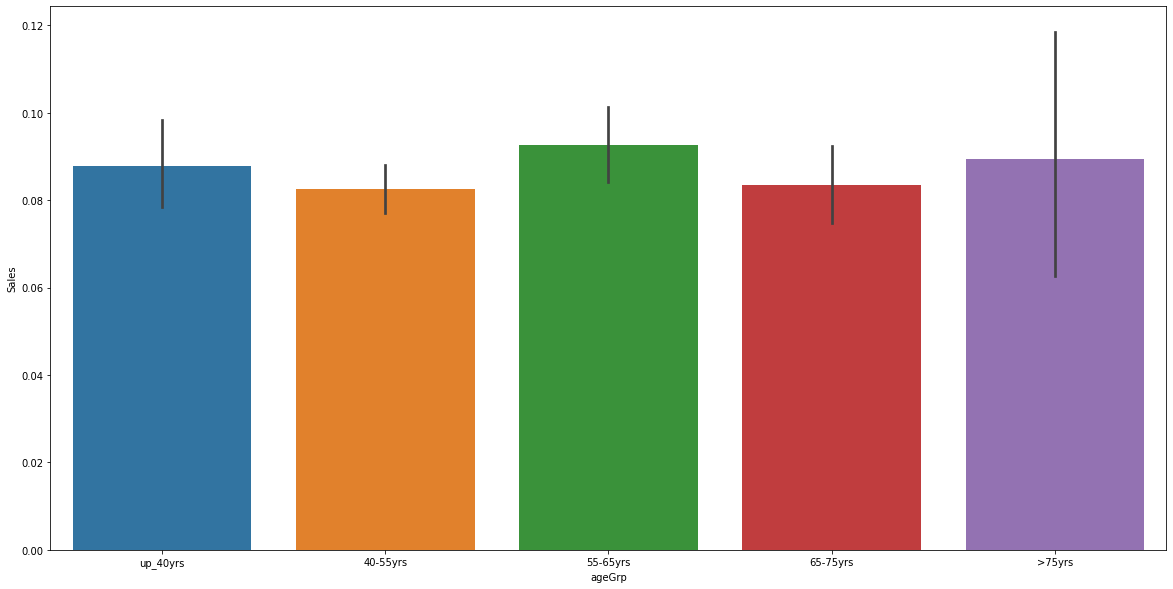

In [41]:
# Plot the distribution new feature ageGrp and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="ageGrp", y="Sales", data=dataset[0])
plt.show()

In [42]:
# Count unique values
print("AgeGroup feature have {} unique values".format(dataset[0]['ageGrp'].nunique()))

AgeGroup feature have 5 unique values


In [43]:
# Check the results
pd.crosstab(dataset[0]['ageGrp'], dataset[0]['Sales'])

Sales,0,1
ageGrp,,
up_40yrs,2719,262
40-55yrs,8038,723
55-65yrs,3845,392
65-75yrs,3306,301
>75yrs,377,37


### Combine `yearBuilt`

In [44]:
dataset[0]['yearBuilt'].dtypes

dtype('float64')

In [45]:
2020 - dataset[0]['yearBuilt']

0         15.0
1         22.0
2         46.0
3         13.0
4         18.0
         ...  
19995     51.0
19996     40.0
19997     36.0
19998     45.0
19999    110.0
Name: yearBuilt, Length: 20000, dtype: float64

In [46]:
years = pd.to_datetime('now').year - dataset[0]['yearBuilt']

In [47]:
dataset[0]['builtYrs'] = years
dataset[1]['builtYrs'] = pd.to_datetime('now').year - dataset[1]['yearBuilt']

In [48]:
dataset[0]

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp,tenureYrs,tenureYrs_z,tenureGrp,ageYrs,ageGrp,builtYrs
0,1,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,...,15345.3798,76897.09528,35147.05566,0.000,8,0.903090,up_10yrs,45.0,40-55yrs,15.0
1,2,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thursday,...,3485.5758,18037.38088,8133.08226,0.000,9,0.954243,up_10yrs,59.0,55-65yrs,22.0
2,3,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thursday,...,13911.2298,69779.49768,31880.39706,98010.783,28,1.447158,>25yrs,70.0,65-75yrs,46.0
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,8026.6158,40574.30488,18476.52126,0.000,9,0.954243,up_10yrs,58.0,55-65yrs,13.0
4,5,0,MOBILE PHONE,0,1992,2,0,0,14.50,Wednesday,...,5293.5498,179130.14408,9271.25046,0.000,28,1.447158,>25yrs,51.0,40-55yrs,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Thursday,...,5225.8878,31736.20088,14420.22726,44352.684,7,0.845098,up_10yrs,70.0,65-75yrs,51.0
19996,19997,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Friday,...,2453.1678,21709.78488,9818.55126,0.000,7,0.845098,up_10yrs,37.0,up_40yrs,40.0
19997,19998,0,FIXED / LAND PHONE,0,2009,4,0,1,14.50,Monday,...,6535.0458,33171.76968,15079.08906,46377.495,11,1.041393,10-15yrs,55.0,40-55yrs,36.0
19998,19999,0,FIXED / LAND PHONE,0,2012,4,0,0,14.50,Monday,...,13416.9318,67326.33288,30754.50426,94550.706,8,0.903090,up_10yrs,53.0,40-55yrs,45.0


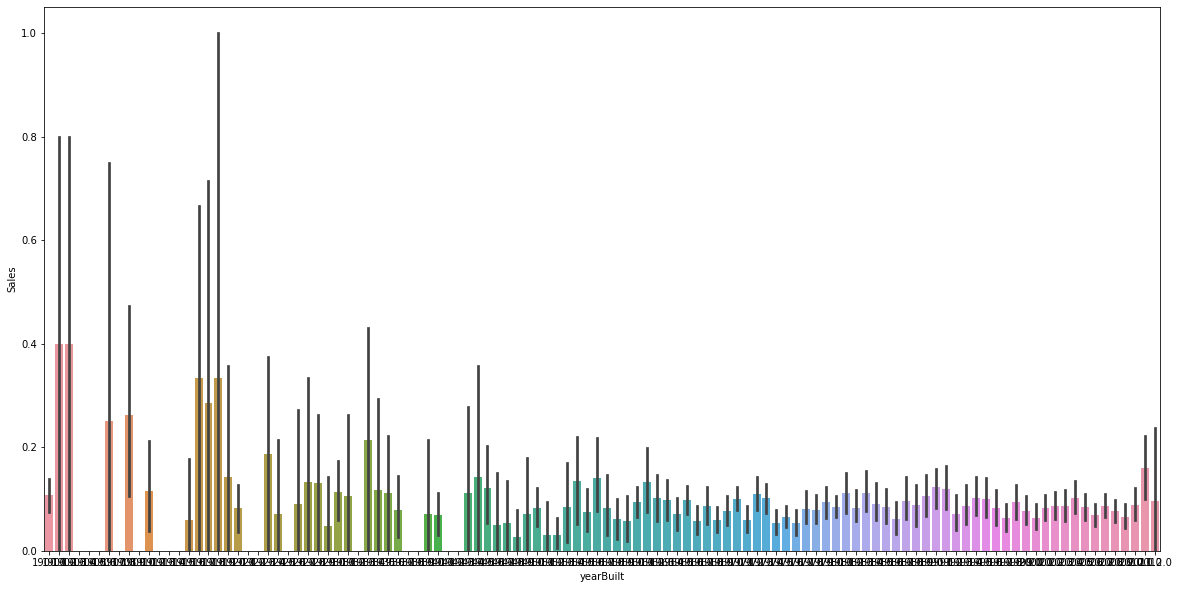

In [49]:
# Plot the distribution yearBuilt and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="yearBuilt", y="Sales", data=dataset[0])
plt.show()

In [50]:
# Count unique values
print("Year built feature have {} unique values".format(dataset[0]['yearBuilt'].nunique()))

Year built feature have 112 unique values


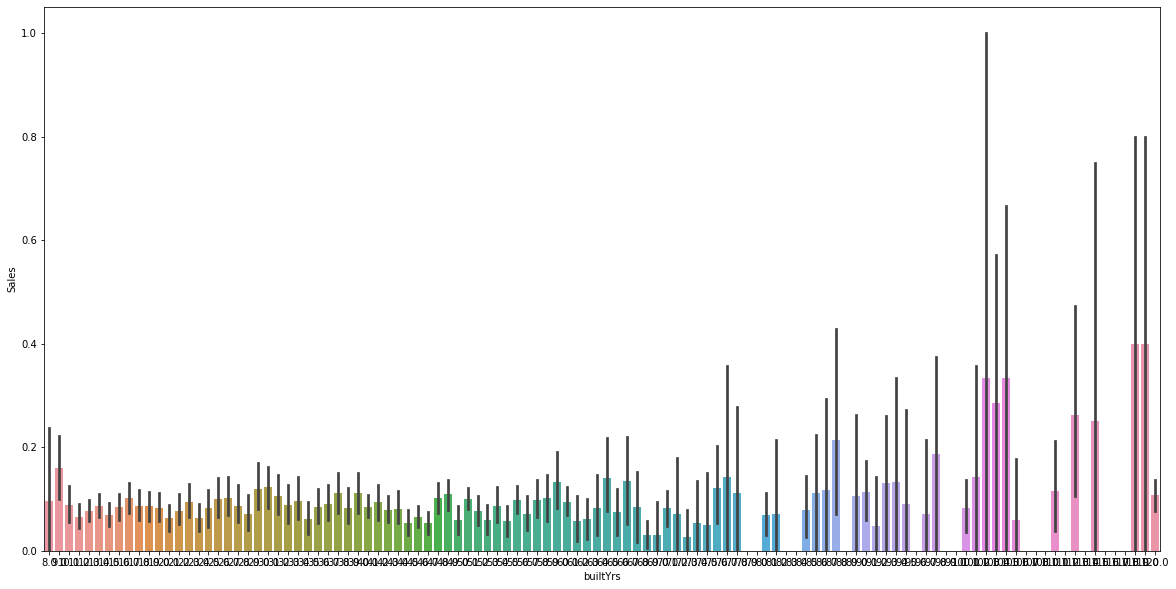

In [51]:
# Plot the distribution new feature builtYrs and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="builtYrs", y="Sales", data=dataset[0])
plt.show()

In [52]:
# Count unique values
print("BuiltYrs feature have {} unique values".format(dataset[0]['builtYrs'].nunique()))

BuiltYrs feature have 112 unique values


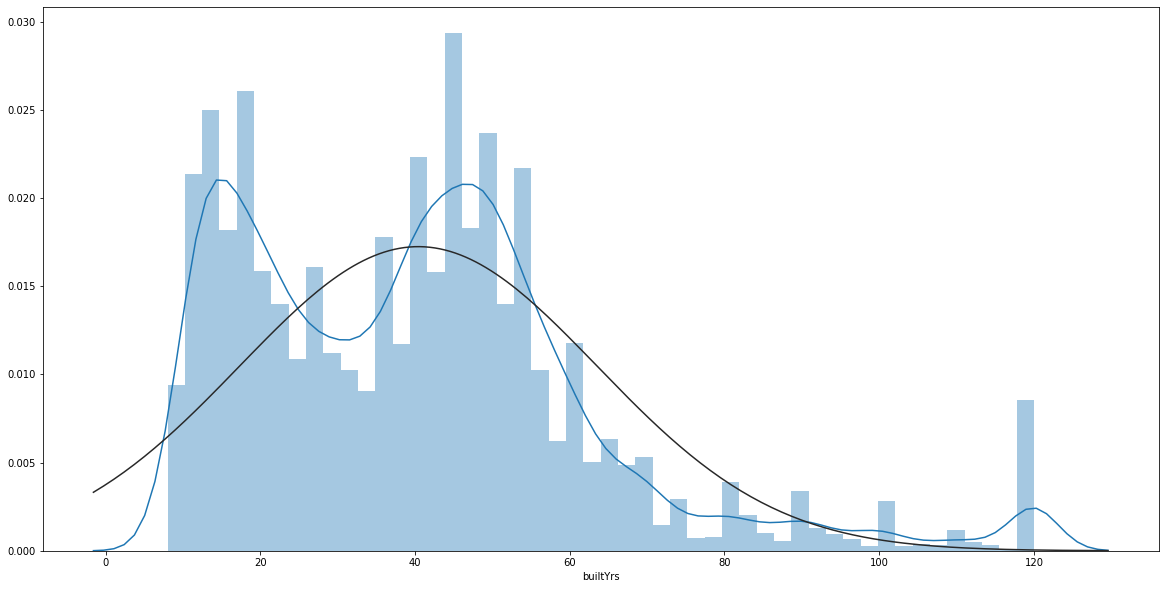

In [53]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['builtYrs'], fit=norm)

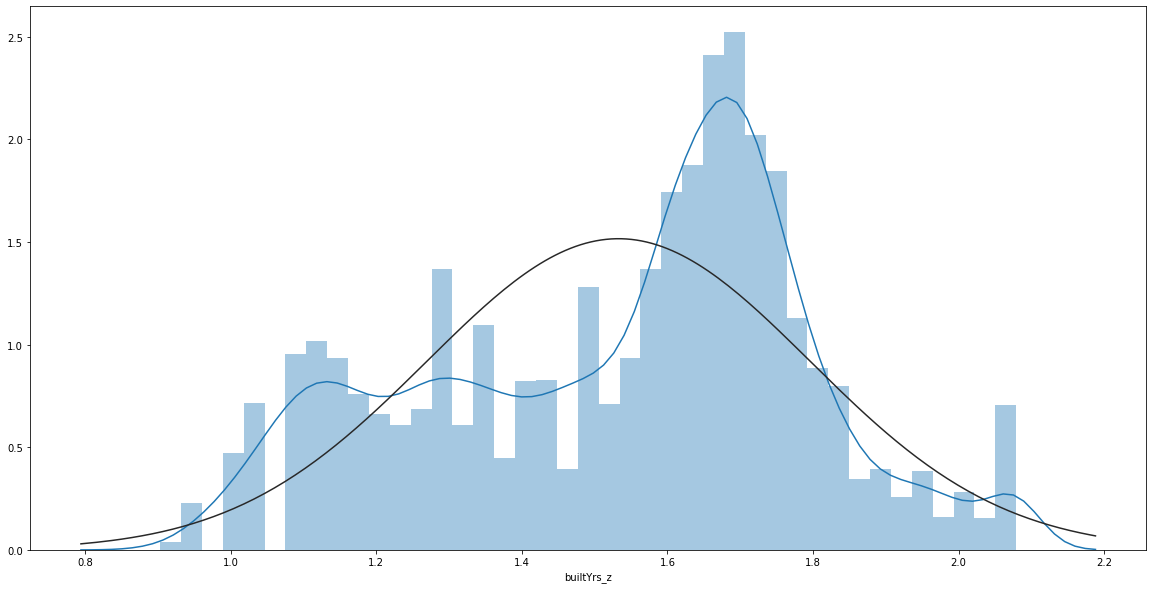

In [54]:
# Normalization
dataset[0]['builtYrs_z'] = np.log10(dataset[0]['builtYrs'])
dataset[1]['builtYrs_z'] = np.log10(dataset[1]['builtYrs'])
# Plot the distribution Z
builtYrs_z = dataset[0]['builtYrs_z']
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(builtYrs_z, fit=norm)

In [55]:
# grouped in 7 bins
bins = [0, 10, 20, 30, 40, 50, 60, np.inf]
labels = ['up_10yrs', '10-20yrs', '20-30yrs', '30-40yrs', '40-50yrs', '50-60yrs','>60yrs']
dataset[0]['builtYrsGrp'] = pd.cut(dataset[0]["builtYrs"], bins, labels = labels)
dataset[1]['builtYrsGrp'] = pd.cut(dataset[1]["builtYrs"], bins, labels = labels)

In [56]:
dataset[0]['builtYrsGrp']

0        10-20yrs
1        20-30yrs
2        40-50yrs
3        10-20yrs
4        10-20yrs
           ...   
19995    50-60yrs
19996    30-40yrs
19997    30-40yrs
19998    40-50yrs
19999      >60yrs
Name: builtYrsGrp, Length: 20000, dtype: category
Categories (7, object): [up_10yrs < 10-20yrs < 20-30yrs < 30-40yrs < 40-50yrs < 50-60yrs < >60yrs]

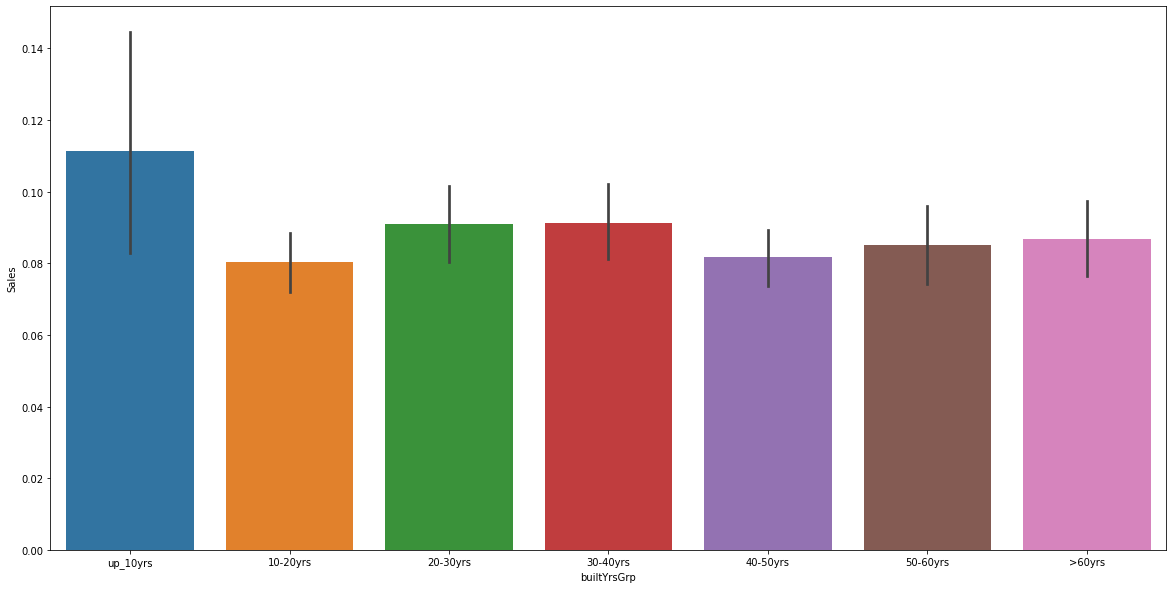

In [57]:
# Plot the distribution new feature builtYrsGrp and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="builtYrsGrp", y="Sales", data=dataset[0])
plt.show()

In [58]:
# Count unique values
print("builtYrsGrp feature have {} unique values".format(dataset[0]['builtYrsGrp'].nunique()))

builtYrsGrp feature have 7 unique values


In [59]:
# Check the results
pd.crosstab(dataset[0]['builtYrsGrp'], dataset[0]['Sales'])

Sales,0,1
builtYrsGrp,,
up_10yrs,375,47
10-20yrs,4068,355
20-30yrs,2440,244
30-40yrs,2596,261
40-50yrs,3891,346
50-60yrs,2528,235
>60yrs,2387,227


In [60]:
# Compare new features
dataset[0][['ageGrp', 'ageYrs', 'tenureGrp', 'tenureYrs' ,'builtYrsGrp', 'builtYrs']].head(20)

,ageGrp,ageYrs,tenureGrp,tenureYrs,builtYrsGrp,builtYrs
0,40-55yrs,45.0,up_10yrs,8,10-20yrs,15.0
1,55-65yrs,59.0,up_10yrs,9,20-30yrs,22.0
2,65-75yrs,70.0,>25yrs,28,40-50yrs,46.0
3,55-65yrs,58.0,up_10yrs,9,10-20yrs,13.0
4,40-55yrs,51.0,>25yrs,28,10-20yrs,18.0
5,40-55yrs,45.0,10-15yrs,11,20-30yrs,23.0
6,55-65yrs,64.0,up_10yrs,8,20-30yrs,27.0
7,40-55yrs,47.0,20-25yrs,25,30-40yrs,35.0
8,65-75yrs,75.0,up_10yrs,9,30-40yrs,34.0
9,55-65yrs,60.0,10-15yrs,11,10-20yrs,12.0


In [61]:
dataset[0].loc[dataset[0]['builtYrs']<15].head(10)

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,Credit_imp,Savings_imp,tenureYrs,tenureYrs_z,tenureGrp,ageYrs,ageGrp,builtYrs,builtYrs_z,builtYrsGrp
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,18476.52126,0.000,9,0.954243,up_10yrs,58.0,55-65yrs,13.0,1.113943,10-20yrs
9,10,0,MOBILE PHONE,0,2009,2,0,0,14.50,Sunday,...,11784.06666,0.000,11,1.041393,10-15yrs,60.0,55-65yrs,12.0,1.079181,10-20yrs
14,15,0,MOBILE PHONE,0,2013,2,0,0,14.50,Monday,...,13406.87946,0.000,7,0.845098,up_10yrs,48.0,40-55yrs,12.0,1.079181,10-20yrs
22,23,0,MOBILE PHONE,0,1997,4,0,0,14.50,Tuesday,...,19685.38986,0.000,23,1.361728,20-25yrs,49.0,40-55yrs,13.0,1.113943,10-20yrs
25,26,0,MOBILE PHONE,0,2011,6,0,1,14.50,Monday,...,6869.74926,0.000,9,0.954243,up_10yrs,69.0,65-75yrs,10.0,1.000000,up_10yrs
36,37,0,MOBILE PHONE,0,2013,2,0,0,14.50,Tuesday,...,18624.44106,0.000,7,0.845098,up_10yrs,65.0,55-65yrs,14.0,1.146128,10-20yrs
41,42,0,MOBILE PHONE,0,2013,2,0,0,14.50,Thursday,...,10029.17646,0.000,7,0.845098,up_10yrs,56.0,55-65yrs,12.0,1.079181,10-20yrs
44,45,0,MOBILE PHONE,0,2010,2,0,0,11.12,Wednesday,...,13913.71326,0.000,10,1.000000,up_10yrs,59.0,55-65yrs,12.0,1.079181,10-20yrs
67,68,0,MOBILE PHONE,0,2012,2,0,0,14.50,Wednesday,...,8528.92086,0.000,8,0.903090,up_10yrs,56.0,55-65yrs,12.0,1.079181,10-20yrs
76,77,0,MOBILE PHONE,0,1991,2,0,0,14.50,Tuesday,...,11322.57066,9733.689,29,1.462398,>25yrs,68.0,65-75yrs,14.0,1.146128,10-20yrs


### Combine `Living Area (m^2)`

In [62]:
dataset[0]['Living Area (m^2)'].dtypes

dtype('float64')

In [63]:
dataset[0]['Living Area (m^2)']

0          68.28964
1          85.60244
2         170.12964
3         158.64584
4         128.87104
            ...    
19995      95.37104
19996      96.42964
19997    1009.63964
19998     414.67964
19999      57.75724
Name: Living Area (m^2), Length: 20000, dtype: float64

In [64]:
# Count unique values
print("Living Area (m^2) built feature have {} unique values".format(dataset[0]['Living Area (m^2)'].nunique()))

Living Area (m^2) built feature have 7142 unique values


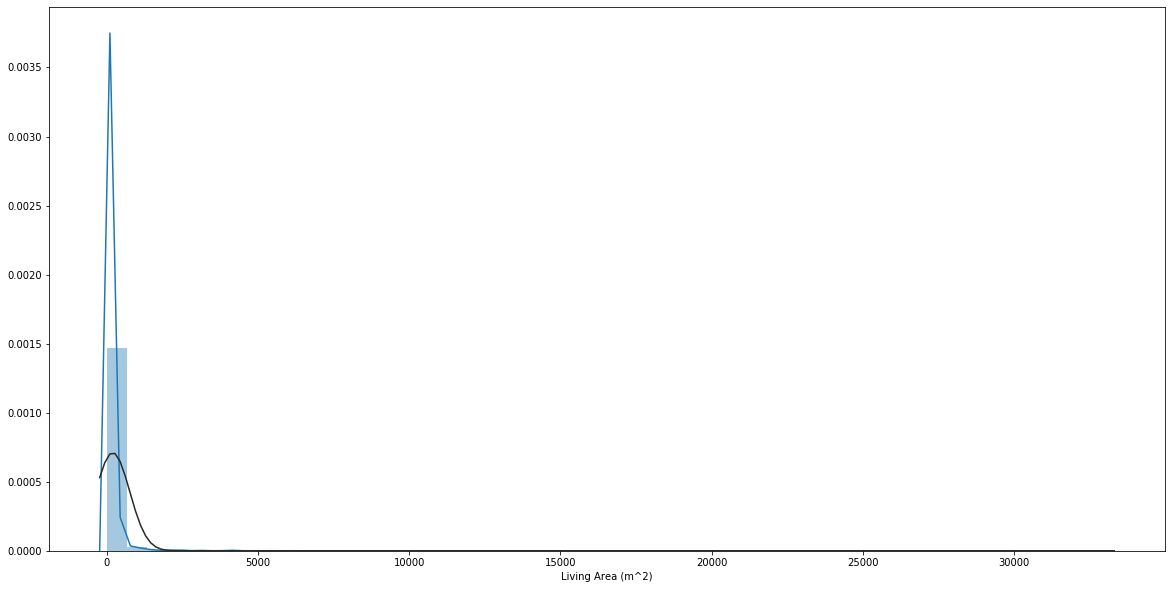

In [65]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['Living Area (m^2)'], fit=norm)

In [66]:
dataset[0]['Living Area (m^2)'].describe()

count    20000.000000
mean       198.192307
std        560.860178
min          0.000000
25%         84.249040
50%        118.392240
75%        176.119440
max      33077.179640
Name: Living Area (m^2), dtype: float64

## Normalize

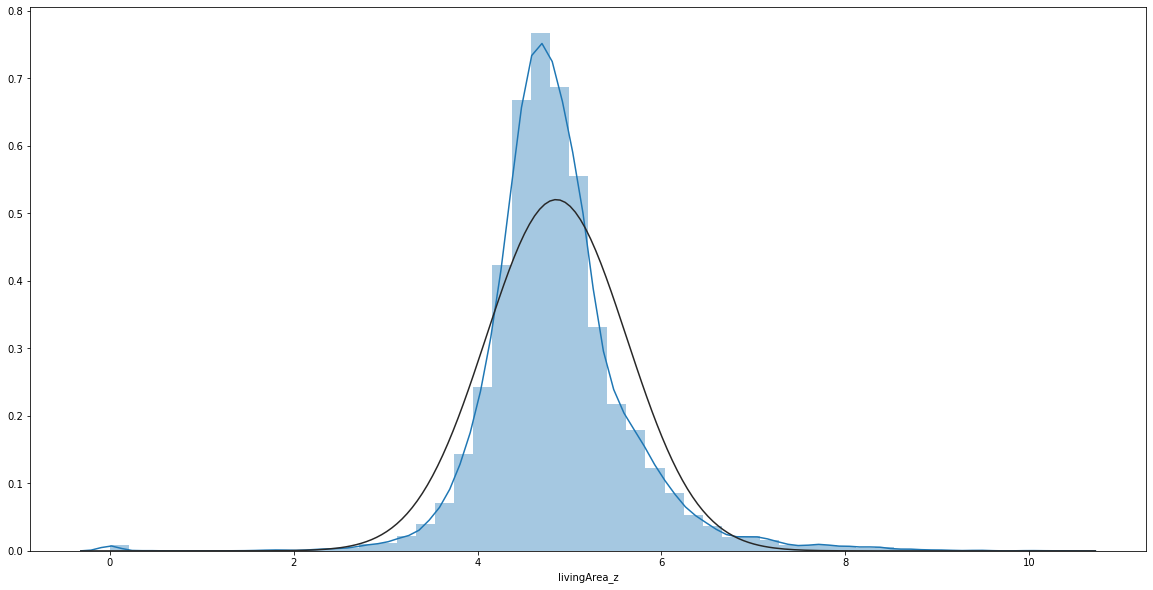

In [67]:
dataset[0]['livingArea_z'] = np.log1p(dataset[0]['Living Area (m^2)'])
dataset[1]['livingArea_z'] = np.log1p(dataset[1]['Living Area (m^2)'])
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['livingArea_z'], fit=norm)

In [68]:
dataset[0]["Living Area (m^2)"].value_counts()

130.59964    171
165.43964     60
106.47964     56
133.27964     54
152.03964     46
            ... 
152.74984      1
82.76164       1
84.31604       1
149.30604      1
33.87844       1
Name: Living Area (m^2), Length: 7142, dtype: int64

In [69]:
pd.qcut(dataset[0]["Living Area (m^2)"], q=20)

0           (59.58, 69.228]
1          (84.249, 90.838]
2        (160.637, 176.119]
3        (147.671, 160.637]
4         (127.108, 135.63]
                ...        
19995        (90.838, 97.1]
19996        (90.838, 97.1]
19997    (460.24, 33077.18]
19998       (311.5, 460.24]
19999       (46.381, 59.58]
Name: Living Area (m^2), Length: 20000, dtype: category
Categories (20, interval[float64]): [(-0.001, 46.381] < (46.381, 59.58] < (59.58, 69.228] < (69.228, 77.187] ... (199.829, 240.48] < (240.48, 311.5] < (311.5, 460.24] < (460.24, 33077.18]]

In [70]:
# grouped in 10 bins
bins = [-np.inf, 100, 200, 300, 400, 500, 600, 700, 800, 900, np.inf]
labels = ['up_100m2', '100-200m2', '200-300m2', '300-400m2',
          '400-500m2', '500-600m2','600-700m2', '700-800m2', '800-900m2', '>900m2']
dataset[0]['livingAreaGrp'] = pd.cut(dataset[0]["Living Area (m^2)"], bins, labels = labels)
dataset[1]['livingAreaGrp'] = pd.cut(dataset[1]["Living Area (m^2)"], bins, labels = labels)

In [71]:
dataset[0]['livingAreaGrp']

0         up_100m2
1         up_100m2
2        100-200m2
3        100-200m2
4        100-200m2
           ...    
19995     up_100m2
19996     up_100m2
19997       >900m2
19998    400-500m2
19999     up_100m2
Name: livingAreaGrp, Length: 20000, dtype: category
Categories (10, object): [up_100m2 < 100-200m2 < 200-300m2 < 300-400m2 ... 600-700m2 < 700-800m2 < 800-900m2 < >900m2]

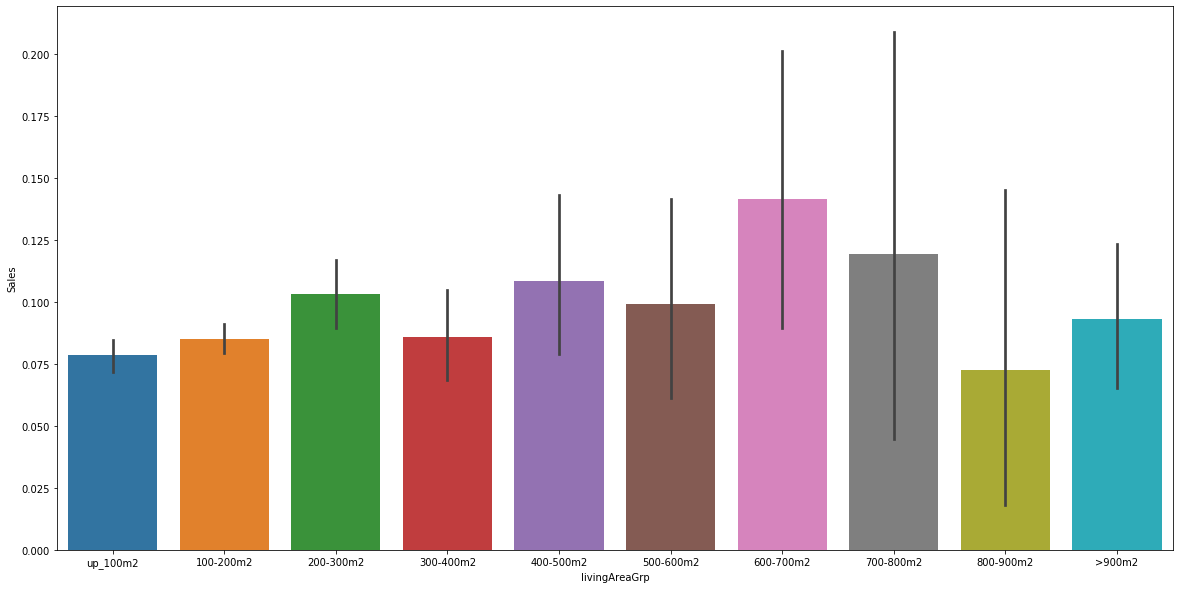

In [72]:
# Plot the distribution new feature livingAreaGrp and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="livingAreaGrp", y="Sales", data=dataset[0])
plt.show()

In [73]:
# Count unique values
print("livingAreaGrp feature have {} unique values".format(dataset[0]['livingAreaGrp'].nunique()))

livingAreaGrp feature have 10 unique values


In [74]:
# Check the results
pd.crosstab(dataset[0]['livingAreaGrp'], dataset[0]['Sales'])

Sales,0,1
livingAreaGrp,,
up_100m2,6882,587
100-200m2,7806,728
200-300m2,1685,194
300-400m2,775,73
400-500m2,361,44
500-600m2,191,21
600-700m2,115,19
700-800m2,59,8
800-900m2,51,4


In [75]:
dataset[0].loc[dataset[0]['Living Area (m^2)']>20000].head(10).iloc[:,1:20]

,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,CodeCategory,Birthdate,Product Type,Number of Semesters Paid,Socieconomic Status,Province,Right Address,Living Area (m^2),House Price,Income
7539,0,MOBILE PHONE,0,2004,4,0,0,11.12,Monday,Not Interested,1984.0,0,NotClient,Medium,ZA,Right,21764.89964,3.140108e+06,861825.943314
13488,0,MOBILE PHONE,0,2010,4,0,0,11.12,Thursday,Not Interested,1963.0,0,NotClient,Medium,MA,Right,25392.27964,1.989195e+05,54130.335714
18290,1,MOBILE PHONE,0,2011,4,0,1,21.85,Tuesday,Sale,1982.0,A,Zero,Medium,VI,Right,21764.89964,NaN,NaN
18303,0,FIXED / LAND PHONE,0,2005,2,0,0,11.12,Monday,Not Interested,1967.0,0,NotClient,Medium,BA,Right,33077.17964,2.943184e+05,80328.331314


> Check other status variables `House Price`, `Income`, `House Insurance`, `Pension Plan`, `Credit`, `Savings`.

In [76]:
dataset[0].columns.tolist()

['Obs',
 'Sales',
 'PhoneType',
 'Email',
 'Tenure',
 'NumberofCampaigns',
 'ProdActive',
 'ProdBought',
 'Premium Offered',
 'Phone Call Day',
 'CodeCategory',
 'Birthdate',
 'Product Type',
 'Number of Semesters Paid',
 'Socieconomic Status',
 'Province',
 'Right Address',
 'Living Area (m^2)',
 'House Price',
 'Income',
 'yearBuilt',
 'House Insurance',
 'Pension Plan',
 'Estimated number of cars',
 'Probability of Second Residence',
 'Credit',
 'Savings',
 'Number of Mobile Phones',
 'Number of Fixed Lines',
 'ADSL',
 '3G Devices',
 'Type of House',
 'new_PhoneCallDay',
 'House Price_imp',
 'Income_imp',
 'House Insurance_imp',
 'Pension Plan_imp',
 'Credit_imp',
 'Savings_imp',
 'tenureYrs',
 'tenureYrs_z',
 'tenureGrp',
 'ageYrs',
 'ageGrp',
 'builtYrs',
 'builtYrs_z',
 'builtYrsGrp',
 'livingArea_z',
 'livingAreaGrp']

 * 'House Price_imp',
 * 'Income_imp',
 * 'House Insurance_imp',
 * 'Pension Plan_imp',
 * 'Credit_imp',
 * 'Savings_imp',

### Combine `House Price_imp`

In [77]:
dataset[0]['House Price_imp'].dtypes

dtype('float64')

In [78]:
dataset[0]['House Price_imp']

0        439134.274215
1        103235.979015
2        398515.957515
3        231849.048015
4        151410.319515
             ...      
19995    181411.869015
19996    124193.568915
19997    189604.431315
19998    384516.228915
19999    153225.656415
Name: House Price_imp, Length: 20000, dtype: float64

In [79]:
# Count unique values
print("House Price_imp built feature have {} unique values".format(dataset[0]['House Price_imp'].nunique()))

House Price_imp built feature have 14241 unique values


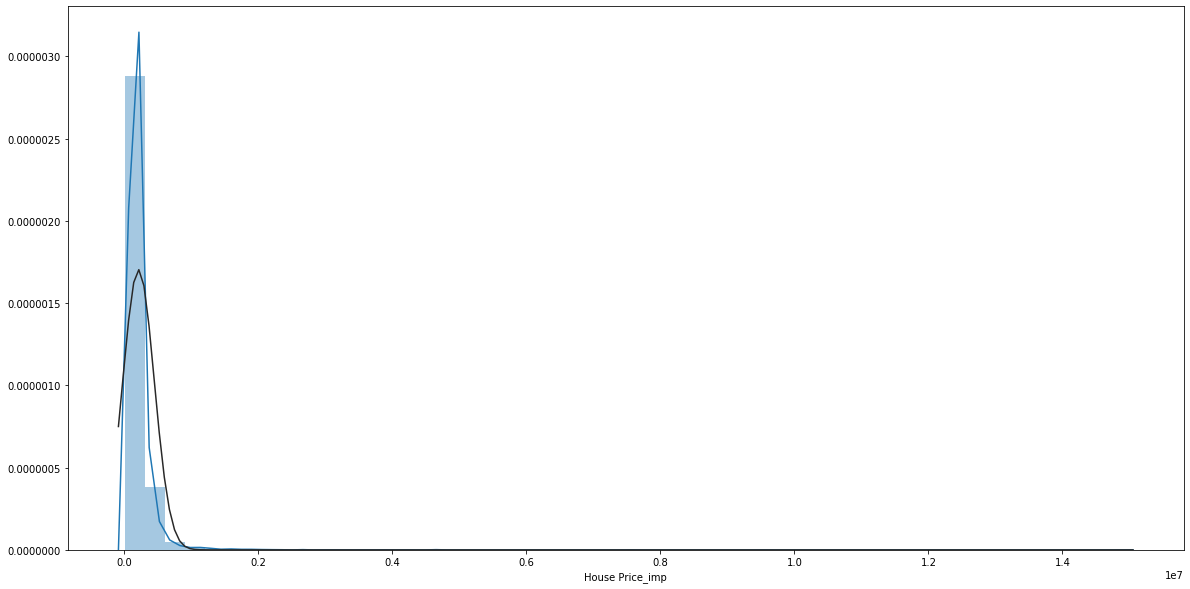

In [80]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['House Price_imp'], fit=norm)

In [81]:
z_10 = np.log10(dataset[0]['House Price_imp'])
z_1p = np.log1p(dataset[0]['House Price_imp'])
z_2 = np.log2(dataset[0]['House Price_imp'])
z = np.log(dataset[0]['House Price_imp'])

In [82]:
df_z = pd.DataFrame({
    'original':dataset[0]['House Price_imp'],
    'z':z,
    'z_2':z_2,
    'z_10':z_10,
    'z_1p':z_1p
})
df_z

,original,z,z_2,z_10,z_1p
0,439134.274215,12.992561,18.744303,5.642597,12.992563
1,103235.979015,11.544773,16.655586,5.013831,11.544782
2,398515.957515,12.895503,18.604278,5.600446,12.895505
3,231849.048015,12.353842,17.822826,5.365205,12.353846
4,151410.319515,11.927749,17.208104,5.180155,11.927755
...,...,...,...,...,...
19995,181411.869015,12.108525,17.468909,5.258666,12.108531
19996,124193.568915,11.729597,16.922231,5.094099,11.729605
19997,189604.431315,12.152695,17.532633,5.277848,12.152701
19998,384516.228915,12.859741,18.552685,5.584915,12.859744


In [83]:
df_z.describe()

,original,z,z_2,z_10,z_1p
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.128096e+05,12.072075,17.416323,5.242836,12.072082
std,2.341390e+05,0.577940,0.833791,0.250996,0.577936
min,9.784007e+03,9.188504,13.256210,3.990517,9.188607
25%,1.239579e+05,11.727697,16.919490,5.093274,11.727705
50%,1.700275e+05,12.043715,17.375408,5.230519,12.043721
75%,2.409671e+05,12.392416,17.878477,5.381958,12.392420
max,1.495498e+07,16.520555,23.834123,7.174786,16.520555


<Figure size 1440x720 with 0 Axes>

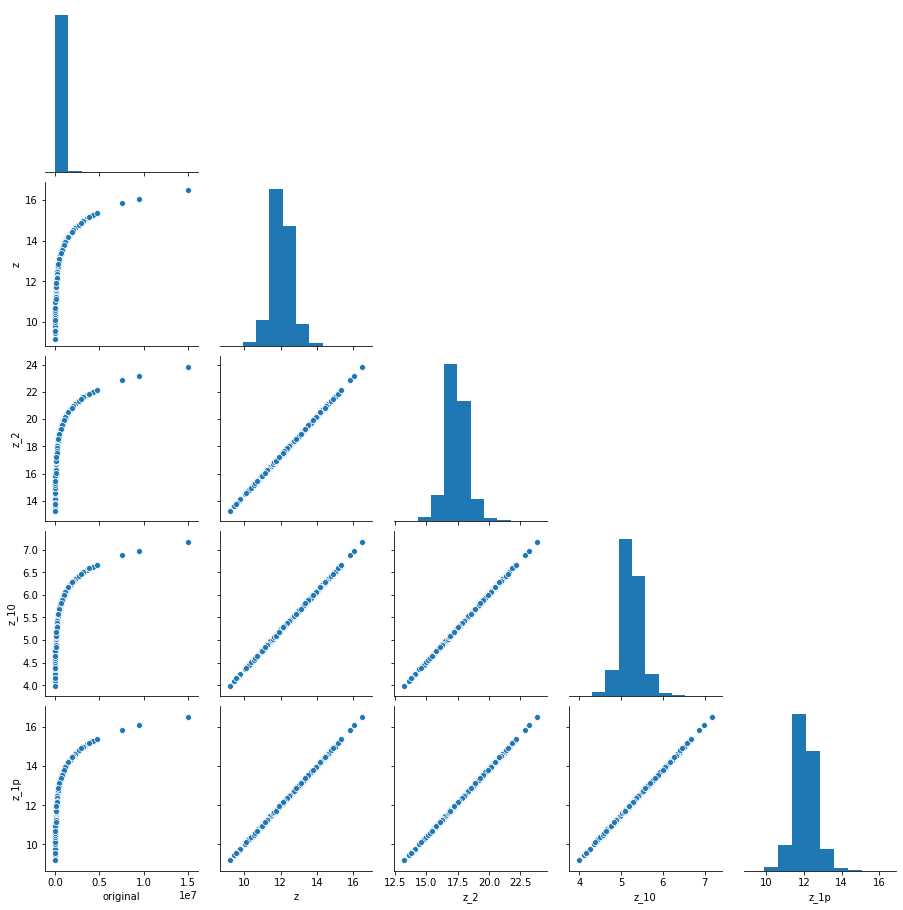

In [84]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.pairplot(df_z, corner=True)

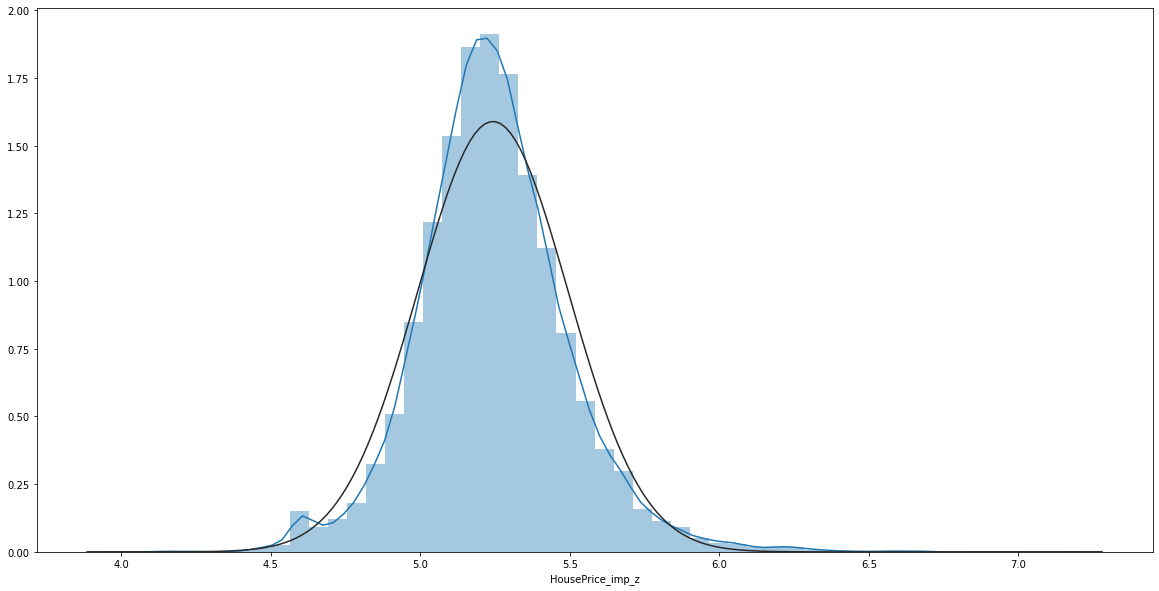

In [85]:
# Normalization
dataset[0]['HousePrice_imp_z'] = np.log10(dataset[0]['House Price_imp'])
dataset[1]['HousePrice_imp_z'] = np.log10(dataset[1]['House Price_imp'])
housePrice_imp_z = dataset[0]['HousePrice_imp_z']
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(housePrice_imp_z, fit=norm)

In [86]:
dataset[0]["House Price_imp"].value_counts()

39575.694015     141
150208.834815     32
322171.164315     30
286049.216115     21
394130.259315     16
                ... 
99648.197415       1
286822.469115      1
242975.502315      1
338805.510615      1
138664.632015      1
Name: House Price_imp, Length: 14241, dtype: int64

In [87]:
pd.qcut(dataset[0]["House Price_imp"], q=6)

0        (284829.509, 14954980.54]
1           (9784.006, 107224.813]
2        (284829.509, 14954980.54]
3           (210461.0, 284829.509]
4         (139406.506, 170027.488]
                   ...            
19995       (170027.488, 210461.0]
19996     (107224.813, 139406.506]
19997       (170027.488, 210461.0]
19998    (284829.509, 14954980.54]
19999     (139406.506, 170027.488]
Name: House Price_imp, Length: 20000, dtype: category
Categories (6, interval[float64]): [(9784.006, 107224.813] < (107224.813, 139406.506] < (139406.506, 170027.488] < (170027.488, 210461.0] < (210461.0, 284829.509] < (284829.509, 14954980.54]]

In [88]:
# grouped in 6 bins
bins = [0, 100000, 250000, 500000, 750000, 1000000, np.inf]
labels = ['up_100k', '100-250k', '250-500k', '500-750k', '750-999k', '>1MM', ]
dataset[0]['HousePrice_impGrp'] = pd.cut(dataset[0]["House Price_imp"], bins, labels = labels)
dataset[1]['HousePrice_impGrp'] = pd.cut(dataset[1]["House Price_imp"], bins, labels = labels)

In [89]:
dataset[0]['HousePrice_impGrp']

0        250-500k
1        100-250k
2        250-500k
3        100-250k
4        100-250k
           ...   
19995    100-250k
19996    100-250k
19997    100-250k
19998    250-500k
19999    100-250k
Name: HousePrice_impGrp, Length: 20000, dtype: category
Categories (6, object): [up_100k < 100-250k < 250-500k < 500-750k < 750-999k < >1MM]

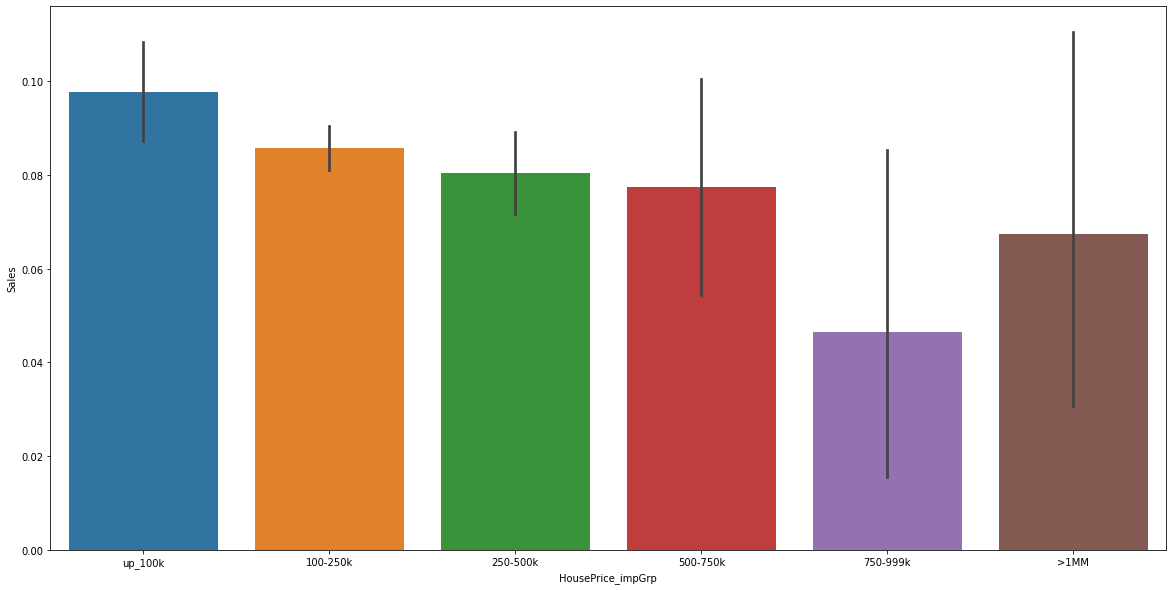

In [90]:
# Plot the distribution new feature House Price_impGrp and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="HousePrice_impGrp", y="Sales", data=dataset[0])
plt.show()

In [91]:
# Count unique values
print("HousePrice_impGrp feature have {} unique values".format(dataset[0]['HousePrice_impGrp'].nunique()))

HousePrice_impGrp feature have 6 unique values


In [92]:
# Check the results
pd.crosstab(dataset[0]['HousePrice_impGrp'], dataset[0]['Sales'])

Sales,0,1
HousePrice_impGrp,,
up_100k,2483,269
100-250k,11572,1085
250-500k,3514,307
500-750k,441,37
750-999k,123,6
>1MM,152,11


### Combine `House Insurance_imp`

In [93]:
dataset[0]['House Insurance_imp'].dtypes

dtype('float64')

In [94]:
dataset[0]['House Insurance_imp']

0        15345.3798
1         3485.5758
2        13911.2298
3         8026.6158
4         5293.5498
            ...    
19995     5225.8878
19996     2453.1678
19997     6535.0458
19998    13416.9318
19999     4827.4218
Name: House Insurance_imp, Length: 20000, dtype: float64

In [95]:
# Count unique values
print("House Insurance_imp built feature have {} unique values".format(dataset[0]['House Insurance_imp'].nunique()))

House Insurance_imp built feature have 14081 unique values


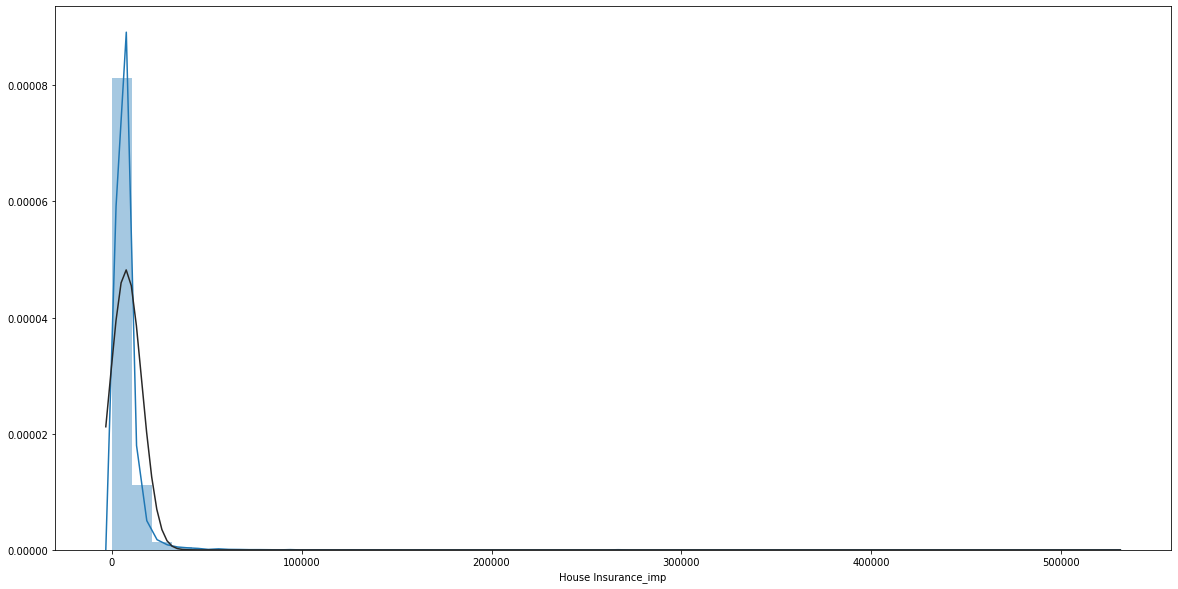

In [96]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['House Insurance_imp'], fit=norm)

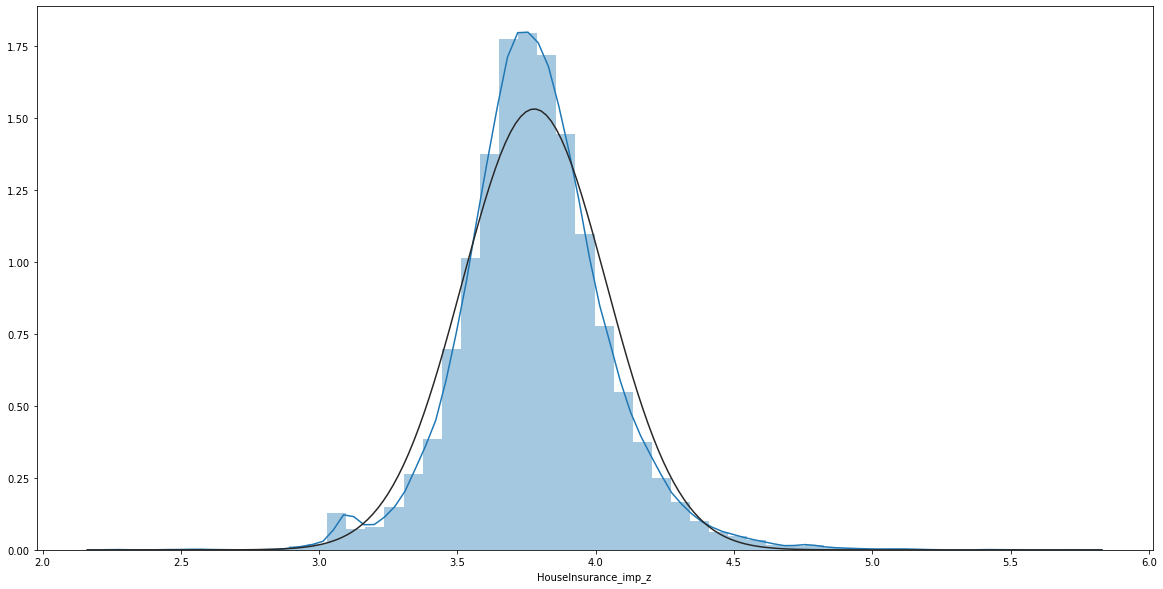

In [97]:
# Normalization
dataset[0]['HouseInsurance_imp_z'] = np.log10(dataset[0]['House Insurance_imp'])
dataset[1]['HouseInsurance_imp_z'] = np.log10(dataset[1]['House Insurance_imp'])
houseInsurance_imp_z = dataset[0]['HouseInsurance_imp_z']
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(houseInsurance_imp_z, fit=norm)

In [98]:
dataset[0]["House Insurance_imp"].value_counts()

1237.8798     142
5144.0778      33
11215.6758     31
9940.3038      21
13756.3938     20
             ... 
7304.5998       1
2776.8978       1
2564.2818       1
11013.8238      1
9800.4078       1
Name: House Insurance_imp, Length: 14081, dtype: int64

In [99]:
pd.qcut(dataset[0]["House Insurance_imp"], q=6)

0        (9943.103, 527866.418]
1           (186.013, 3627.434]
2        (9943.103, 527866.418]
3          (7332.644, 9943.103]
4            (4755.17, 5858.84]
                  ...          
19995        (4755.17, 5858.84]
19996       (186.013, 3627.434]
19997       (5858.84, 7332.644]
19998    (9943.103, 527866.418]
19999        (4755.17, 5858.84]
Name: House Insurance_imp, Length: 20000, dtype: category
Categories (6, interval[float64]): [(186.013, 3627.434] < (3627.434, 4755.17] < (4755.17, 5858.84] < (5858.84, 7332.644] < (7332.644, 9943.103] < (9943.103, 527866.418]]

In [100]:
# grouped in 6 bins
bins = [0, 2500, 5000, 7500, 10000, np.inf]
labels = ['up_2.5k','2.5-5k', '5-7.5k', '7.5-10k', '>10k']
dataset[0]['HouseInsurance_impGrp'] = pd.cut(dataset[0]["House Insurance_imp"], bins, labels = labels)
dataset[1]['HouseInsurance_impGrp'] = pd.cut(dataset[1]["House Insurance_imp"], bins, labels = labels)

In [101]:
dataset[0]['HouseInsurance_impGrp']

0           >10k
1         2.5-5k
2           >10k
3        7.5-10k
4         5-7.5k
          ...   
19995     5-7.5k
19996    up_2.5k
19997     5-7.5k
19998       >10k
19999     2.5-5k
Name: HouseInsurance_impGrp, Length: 20000, dtype: category
Categories (5, object): [up_2.5k < 2.5-5k < 5-7.5k < 7.5-10k < >10k]

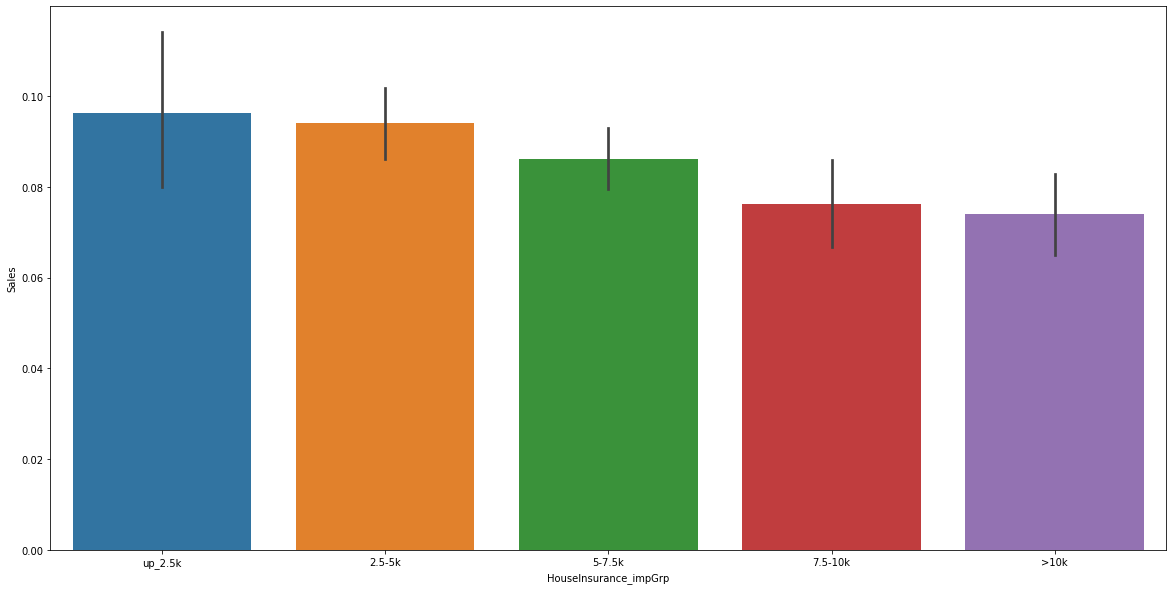

In [102]:
# Plot the distribution new feature House Price_impGrp and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="HouseInsurance_impGrp", y="Sales", data=dataset[0])
plt.show()

In [103]:
# Count unique values
print("HouseInsurance_impGrp feature have {} unique values".format(dataset[0]['HouseInsurance_impGrp'].nunique()))

HouseInsurance_impGrp feature have 5 unique values


In [104]:
# Check the results
pd.crosstab(dataset[0]['HouseInsurance_impGrp'], dataset[0]['Sales'])

Sales,0,1
HouseInsurance_impGrp,,
up_2.5k,1062,113
2.5-5k,5715,594
5-7.5k,5627,531
7.5-10k,2828,233
>10k,3053,244


### Combine `Income_imp`

In [105]:
dataset[0]['Income_imp'].dtypes

dtype('float64')

In [106]:
dataset[0]['Income_imp']

0         55407.736314
1         27854.157114
2        108942.578514
3         63173.280114
4         27635.458914
             ...      
19995     49322.465514
19996     33609.433914
19997     51572.258514
19998    105098.041314
19999     38290.674114
Name: Income_imp, Length: 20000, dtype: float64

In [107]:
# Count unique values
print("Income_imp built feature have {} unique values".format(dataset[0]['Income_imp'].nunique()))

Income_imp built feature have 14232 unique values


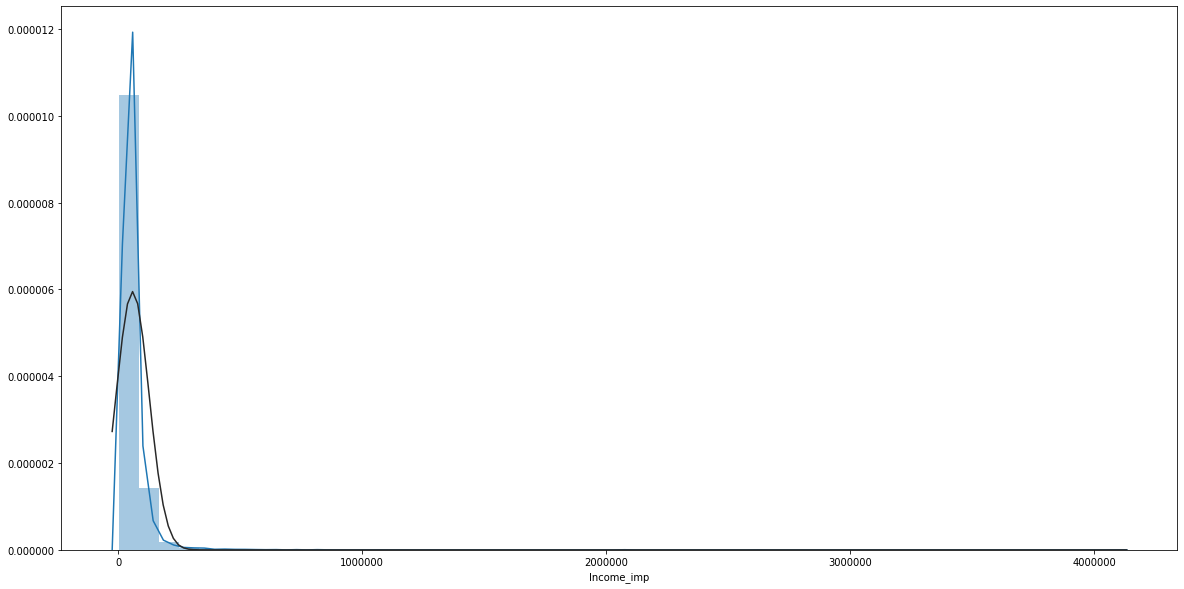

In [108]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['Income_imp'], fit=norm)

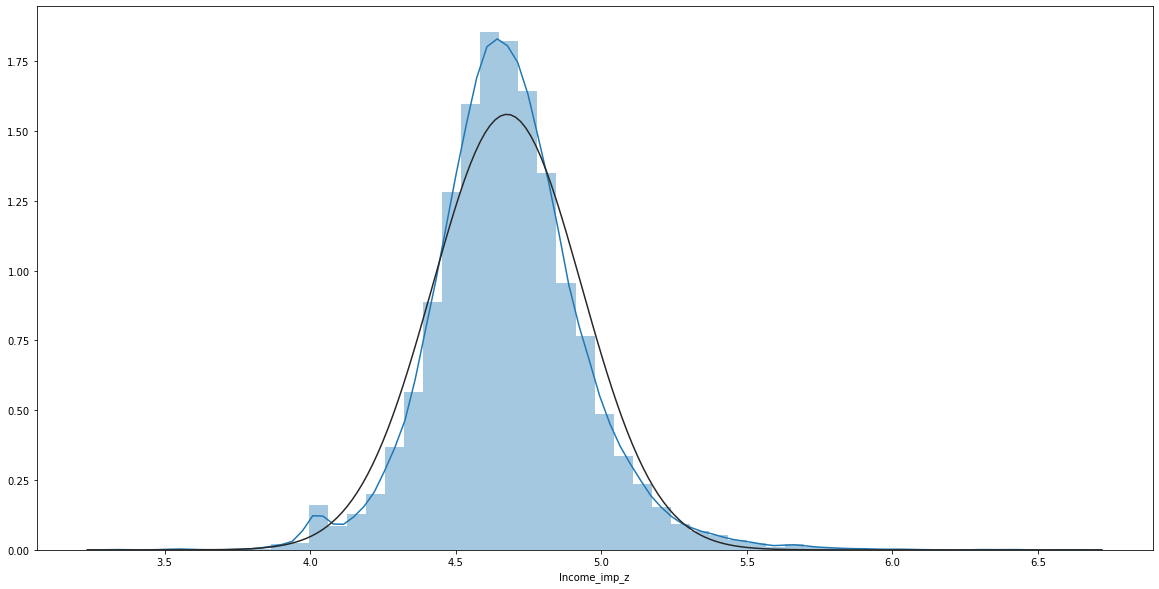

In [109]:
# Normalization
dataset[0]['Income_imp_z'] = np.log10(dataset[0]['Income_imp'])
dataset[1]['Income_imp_z'] = np.log10(dataset[1]['Income_imp'])
income_imp_z = dataset[0]['Income_imp_z']
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(income_imp_z, fit=norm)

In [110]:
dataset[0]["Income_imp"].value_counts()

10372.060314     143
40753.621314      35
87977.123514      34
78057.483714      20
107738.207514     16
                ... 
38865.939714       1
32599.329714       1
70764.099714       1
56707.615314       1
35728.300314       1
Name: Income_imp, Length: 14232, dtype: int64

In [111]:
pd.qcut(dataset[0]["Income_imp"], q=6)

0                 (46294.478, 57672.801]
1        (2190.8039999999996, 28819.523]
2               (77921.874, 4106371.707]
3                 (57672.801, 77921.874]
4        (2190.8039999999996, 28819.523]
                      ...               
19995             (46294.478, 57672.801]
19996             (28819.523, 37640.859]
19997             (46294.478, 57672.801]
19998           (77921.874, 4106371.707]
19999             (37640.859, 46294.478]
Name: Income_imp, Length: 20000, dtype: category
Categories (6, interval[float64]): [(2190.8039999999996, 28819.523] < (28819.523, 37640.859] < (37640.859, 46294.478] < (46294.478, 57672.801] < (57672.801, 77921.874] < (77921.874, 4106371.707]]

In [112]:
# grouped in 6 bins
bins = [0, 25000, 40000, 60000, 80000, 100000, np.inf]
labels = ['up_25k','25-40k', '40-60k', '60-80k', '80-100k', '>100k']
dataset[0]['Income_impGrp'] = pd.cut(dataset[0]["Income_imp"], bins, labels = labels)
dataset[1]['Income_impGrp'] = pd.cut(dataset[1]["Income_imp"], bins, labels = labels)

In [113]:
dataset[0]['Income_impGrp']

0        40-60k
1        25-40k
2         >100k
3        60-80k
4        25-40k
          ...  
19995    40-60k
19996    25-40k
19997    40-60k
19998     >100k
19999    25-40k
Name: Income_impGrp, Length: 20000, dtype: category
Categories (6, object): [up_25k < 25-40k < 40-60k < 60-80k < 80-100k < >100k]

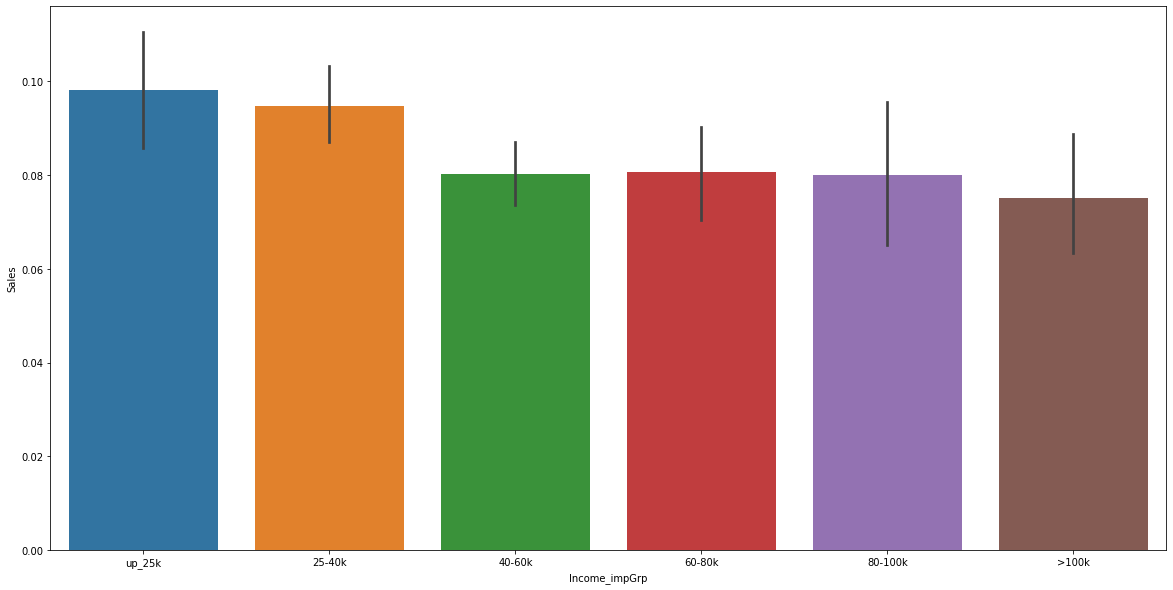

In [114]:
# Plot the distribution new feature House Price_impGrp and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="Income_impGrp", y="Sales", data=dataset[0])
plt.show()

In [115]:
# Count unique values
print("Income_impGrp feature have {} unique values".format(dataset[0]['Income_impGrp'].nunique()))

Income_impGrp feature have 6 unique values


In [116]:
# Check the results
pd.crosstab(dataset[0]['Income_impGrp'], dataset[0]['Sales'])

Sales,0,1
Income_impGrp,,
up_25k,1975,215
25-40k,4918,515
40-60k,5747,502
60-80k,2738,240
80-100k,1231,107
>100k,1676,136


### Combine `Pension Plan_imp`

In [117]:
dataset[0]['Pension Plan_imp'].dtypes

dtype('float64')

In [118]:
dataset[0]['Pension Plan_imp']

0         76897.09528
1         18037.38088
2         69779.49768
3         40574.30488
4        179130.14408
             ...     
19995     31736.20088
19996     21709.78488
19997     33171.76968
19998     67326.33288
19999     24696.85928
Name: Pension Plan_imp, Length: 20000, dtype: float64

In [119]:
# Count unique values
print("Pension Plan_imp feature have {} unique values".format(dataset[0]['Pension Plan_imp'].nunique()))

Pension Plan_imp feature have 14141 unique values


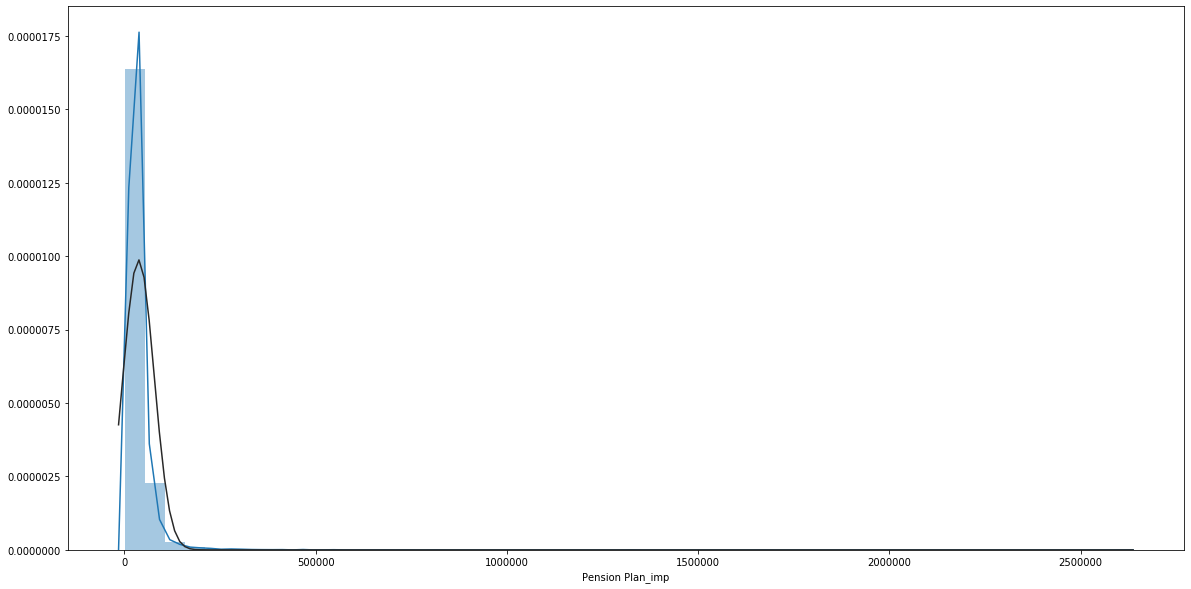

In [120]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['Pension Plan_imp'], fit=norm)

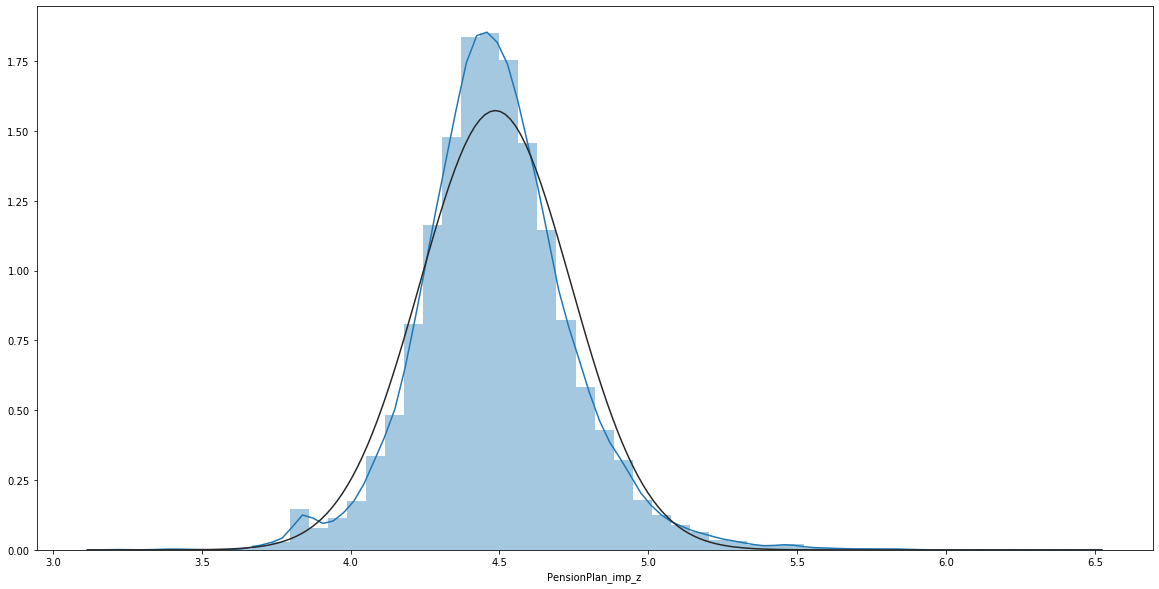

In [121]:
# Normalization
dataset[0]['PensionPlan_imp_z'] = np.log10(dataset[0]['Pension Plan_imp'])
dataset[1]['PensionPlan_imp_z'] = np.log10(dataset[1]['Pension Plan_imp'])
pensionPlan_imp_z = dataset[0]['PensionPlan_imp_z']
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(pensionPlan_imp_z, fit=norm)

In [122]:
dataset[0]["Pension Plan_imp"].value_counts()

6882.09528      141
26268.46488      32
56401.52728      27
50071.84968      17
69010.98088      16
               ... 
23718.98088       1
30223.23368       1
30122.78728       1
12847.23928       1
118792.73128      1
Name: Pension Plan_imp, Length: 14141, dtype: int64

In [123]:
pd.qcut(dataset[0]["Pension Plan_imp"], q=20)

0          (62069.508, 81182.78]
1         (17977.542, 19805.698]
2          (62069.508, 81182.78]
3         (38993.534, 42401.341]
4        (81182.78, 2620519.989]
                  ...           
19995     (29799.418, 31743.858]
19996     (21598.404, 23225.325]
19997     (31743.858, 33875.141]
19998      (62069.508, 81182.78]
19999     (23225.325, 24810.038]
Name: Pension Plan_imp, Length: 20000, dtype: category
Categories (20, interval[float64]): [(1661.722, 12484.984] < (12484.984, 15719.631] < (15719.631, 17977.542] < (17977.542, 19805.698] ... (46703.626, 52990.563] < (52990.563, 62069.508] < (62069.508, 81182.78] < (81182.78, 2620519.989]]

In [124]:
# grouped in 8 bins
bins = [0, 25000, 50000, 100000, 250000, 500000, np.inf]
labels = ['up_25k','25-50k', '50-100k', '100-250k', '250-500k', '>1MM']
dataset[0]['PensionPlan_impGrp'] = pd.cut(dataset[0]["Pension Plan_imp"], bins, labels = labels)
dataset[1]['PensionPlan_impGrp'] = pd.cut(dataset[1]["Pension Plan_imp"], bins, labels = labels)

In [125]:
dataset[0]['PensionPlan_impGrp']

0         50-100k
1          up_25k
2         50-100k
3          25-50k
4        100-250k
           ...   
19995      25-50k
19996      up_25k
19997      25-50k
19998     50-100k
19999      up_25k
Name: PensionPlan_impGrp, Length: 20000, dtype: category
Categories (6, object): [up_25k < 25-50k < 50-100k < 100-250k < 250-500k < >1MM]

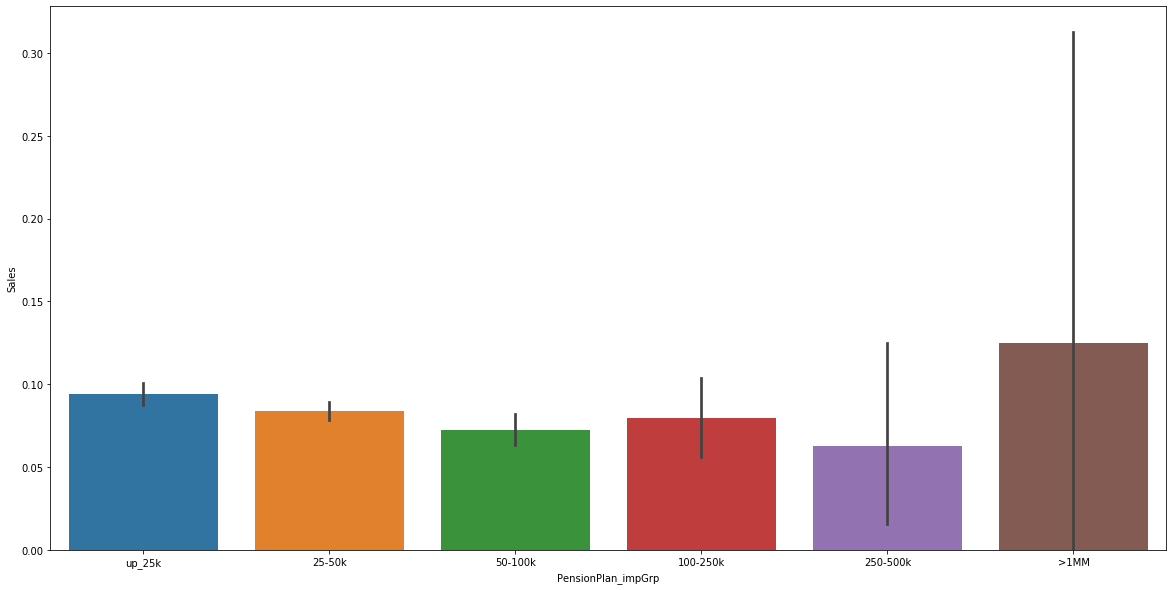

In [126]:
# Plot the distribution new feature House Price_impGrp and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="PensionPlan_impGrp", y="Sales", data=dataset[0])
plt.show()

In [127]:
# Count unique values
print("PensionPlan_impGrp feature have {} unique values".format(dataset[0]['PensionPlan_impGrp'].nunique()))

PensionPlan_impGrp feature have 6 unique values


In [128]:
# Check the results
pd.crosstab(dataset[0]['PensionPlan_impGrp'], dataset[0]['Sales'])

Sales,0,1
PensionPlan_impGrp,,
up_25k,6438,670
25-50k,8705,796
50-100k,2607,203
100-250k,461,40
250-500k,60,4
>1MM,14,2


### Combine `Savings_imp`

In [129]:
dataset[0]['Savings_imp'].dtypes

dtype('float64')

In [130]:
dataset[0]['Savings_imp']

0            0.000
1            0.000
2        98010.783
3            0.000
4            0.000
           ...    
19995    44352.684
19996        0.000
19997    46377.495
19998    94550.706
19999        0.000
Name: Savings_imp, Length: 20000, dtype: float64

In [131]:
# Count unique values
print("Savings_imp feature have {} unique values".format(dataset[0]['Savings_imp'].nunique()))

Savings_imp feature have 6950 unique values


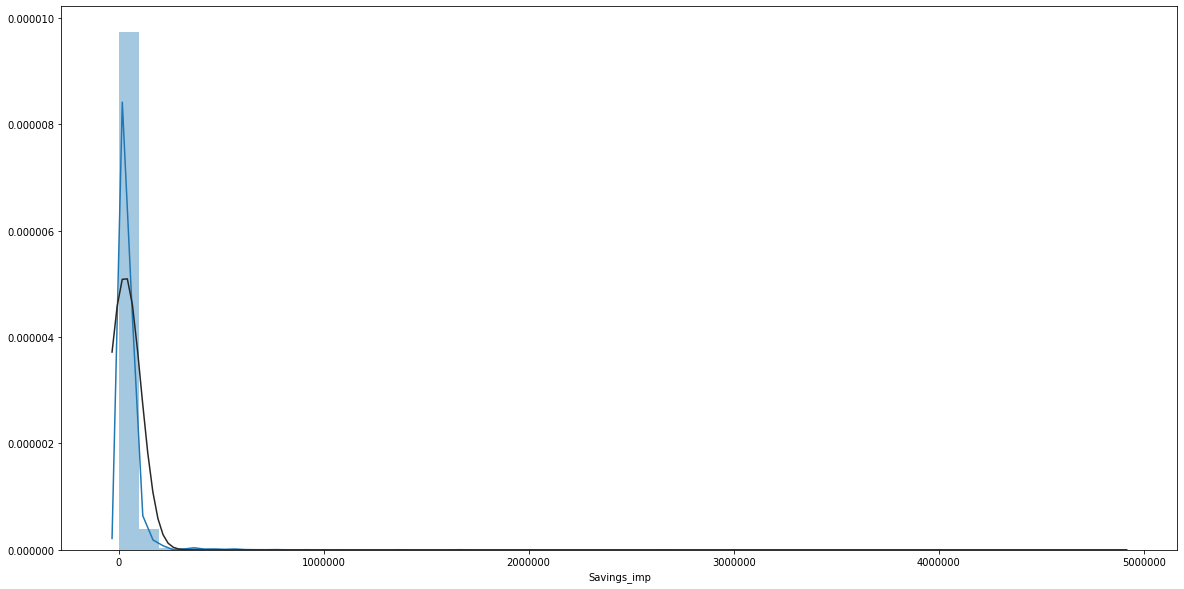

In [132]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['Savings_imp'], fit=norm)

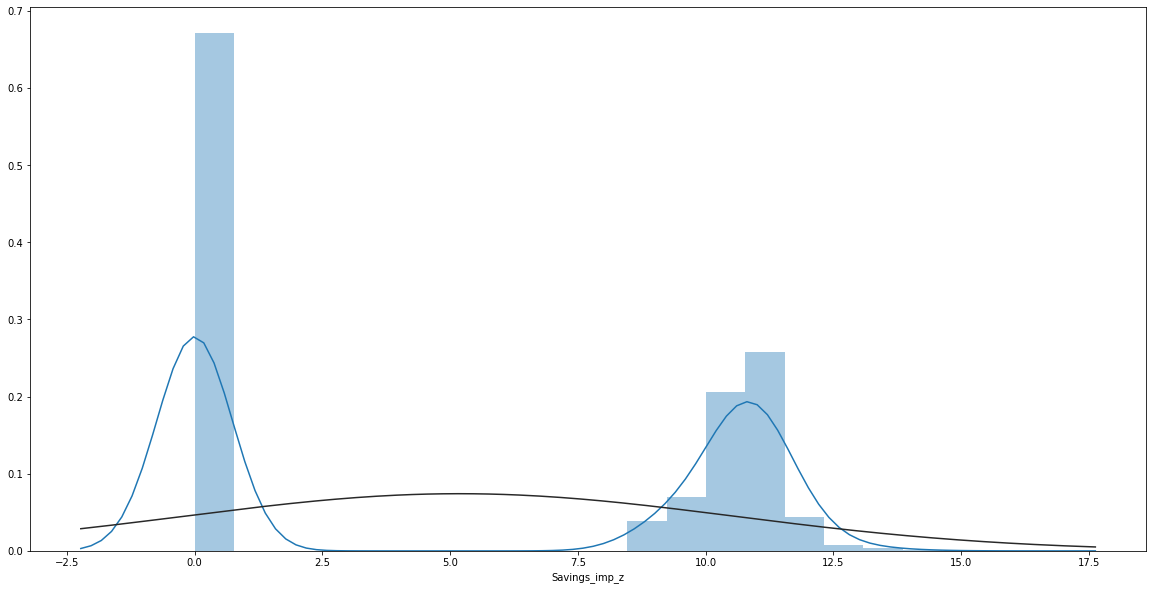

In [133]:
# Normalization
dataset[0]['Savings_imp_z'] = np.log1p(dataset[0]['Savings_imp'])
dataset[1]['Savings_imp_z'] = np.log1p(dataset[1]['Savings_imp'])
savings_imp_z = dataset[0]['Savings_imp_z']
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(savings_imp_z, fit=norm)

In [134]:
dataset[0]["Savings_imp"].value_counts()

0.000        10334
70214.202       23
96926.841       14
8747.595        12
49622.193        9
             ...  
50705.487        1
16833.096        1
43909.317        1
60459.399        1
36502.110        1
Name: Savings_imp, Length: 6950, dtype: int64

In [135]:
# grouped in 6 bins
bins = [-np.inf, 25000, 50000, 100000, 250000, 500000, np.inf]
labels = ['up_25k','25-50k', '50-100k', '100-250k', '250-500k', '>1MM']
dataset[0]['Savings_impGrp'] = pd.cut(dataset[0]["Savings_imp"], bins, labels = labels)
dataset[1]['Savings_impGrp'] = pd.cut(dataset[1]["Savings_imp"], bins, labels = labels)

In [136]:
dataset[0]['Savings_impGrp']

0         up_25k
1         up_25k
2        50-100k
3         up_25k
4         up_25k
          ...   
19995     25-50k
19996     up_25k
19997     25-50k
19998    50-100k
19999     up_25k
Name: Savings_impGrp, Length: 20000, dtype: category
Categories (6, object): [up_25k < 25-50k < 50-100k < 100-250k < 250-500k < >1MM]

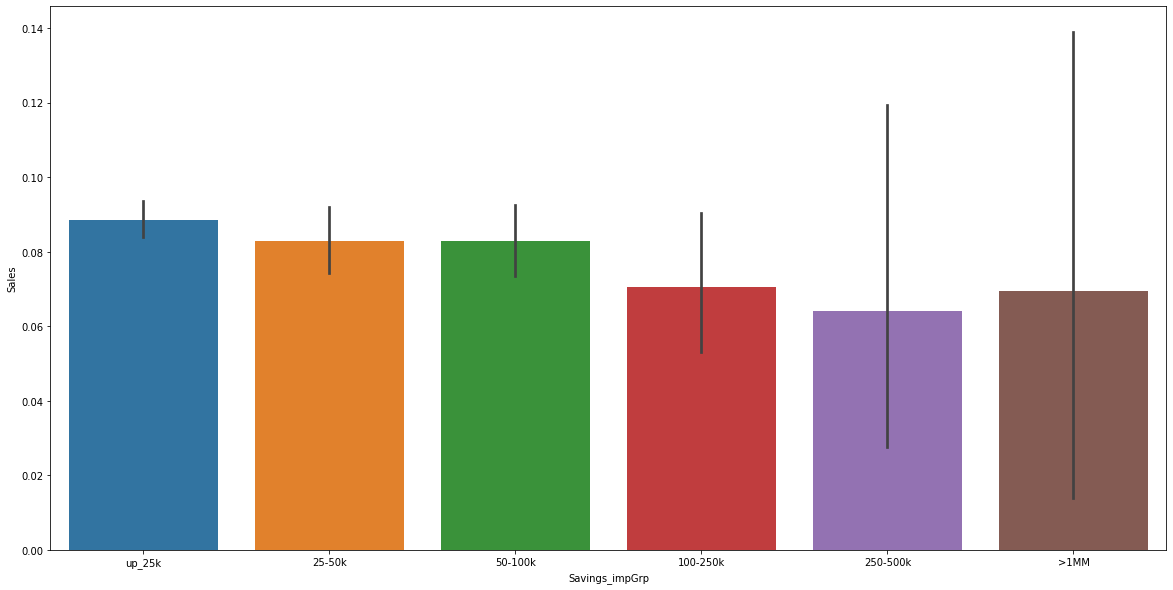

In [137]:
# Plot the distribution new feature House Price_impGrp and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="Savings_impGrp", y="Sales", data=dataset[0])
plt.show()

In [138]:
# Count unique values
print("Savings_impGrp feature have {} unique values".format(dataset[0]['Savings_impGrp'].nunique()))

Savings_impGrp feature have 6 unique values


In [139]:
# Check the results
pd.crosstab(dataset[0]['Savings_impGrp'], dataset[0]['Sales'])

Sales,0,1
Savings_impGrp,,
up_25k,11053,1075
25-50k,3132,283
50-100k,3232,292
100-250k,699,53
250-500k,102,7
>1MM,67,5


### Combine `Credit_imp`

In [140]:
dataset[0]['Credit_imp'].dtypes

dtype('float64')

In [141]:
dataset[0]['Credit_imp']

0        35147.05566
1         8133.08226
2        31880.39706
3        18476.52126
4         9271.25046
            ...     
19995    14420.22726
19996     9818.55126
19997    15079.08906
19998    30754.50426
19999    11189.48466
Name: Credit_imp, Length: 20000, dtype: float64

In [142]:
# Count unique values
print("Credit_imp feature have {} unique values".format(dataset[0]['Credit_imp'].nunique()))

Credit_imp feature have 14141 unique values


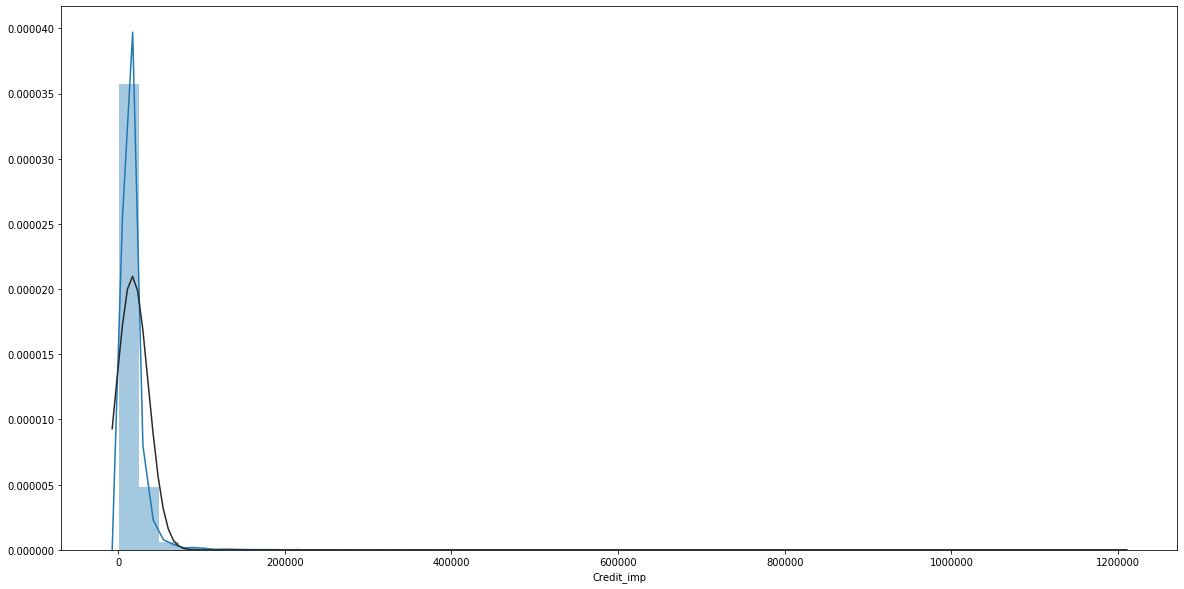

In [143]:
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(dataset[0]['Credit_imp'], fit=norm)

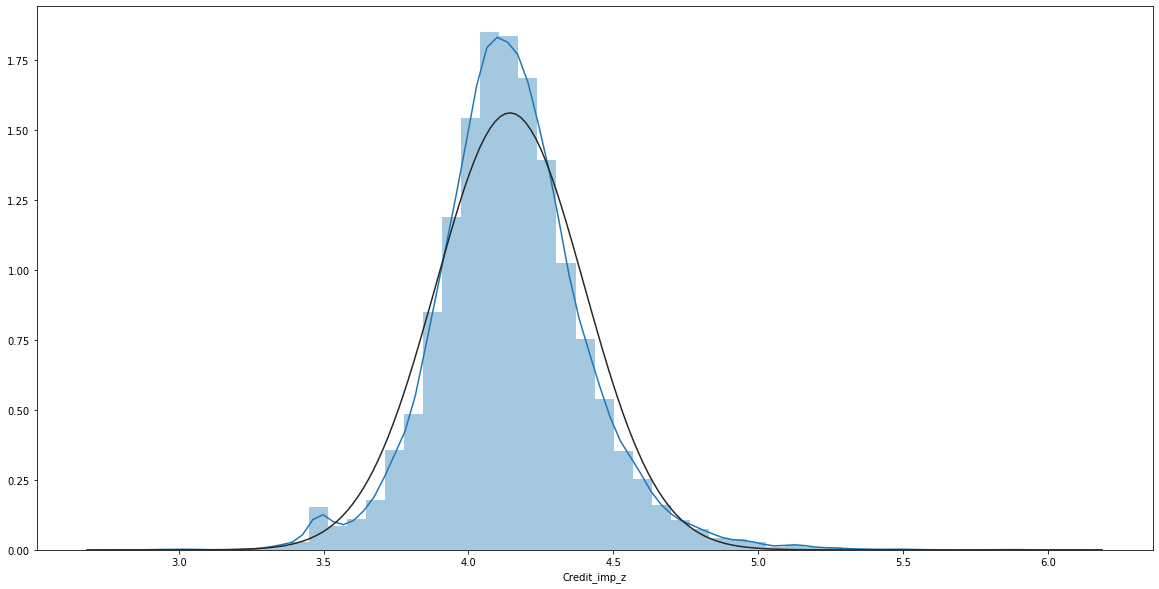

In [144]:
# Normalization
dataset[0]['Credit_imp_z'] = np.log10(dataset[0]['Credit_imp'])
dataset[1]['Credit_imp_z'] = np.log10(dataset[1]['Credit_imp'])
credit_imp_z = dataset[0]['Credit_imp_z']
# Plot the distribution
plt.figure(figsize= [20, 10])
sns.distplot(credit_imp_z, fit=norm)

In [145]:
dataset[0]["Credit_imp"].describe()

count    2.000000e+04
mean     1.700683e+04
std      1.901220e+04
min      6.173887e+02
25%      9.797297e+03
50%      1.359566e+04
75%      1.928109e+04
max      1.202556e+06
Name: Credit_imp, dtype: float64

In [146]:
dataset[0]["Credit_imp"].value_counts()

3013.30566     140
25740.50766     33
11910.78126     31
22835.46906     20
31527.68226     13
              ... 
16469.40726      1
14861.28066      1
11847.60846      1
16321.41366      1
4712.50146       1
Name: Credit_imp, Length: 14141, dtype: int64

In [147]:
pd.qcut(dataset[0]["Credit_imp"], q=5)

0        (21219.323, 1202556.07]
1            (617.388, 8990.254]
2        (21219.323, 1202556.07]
3         (15427.376, 21219.323]
4          (8990.254, 11978.431]
                  ...           
19995     (11978.431, 15427.376]
19996      (8990.254, 11978.431]
19997     (11978.431, 15427.376]
19998    (21219.323, 1202556.07]
19999      (8990.254, 11978.431]
Name: Credit_imp, Length: 20000, dtype: category
Categories (5, interval[float64]): [(617.388, 8990.254] < (8990.254, 11978.431] < (11978.431, 15427.376] < (15427.376, 21219.323] < (21219.323, 1202556.07]]

In [148]:
# grouped in 8 bins
bins = [-np.inf, 25000, 50000, 100000, 250000,  np.inf]
labels = ['up_25k','25-50k', '50-100k', '100-250k', '>250k']
dataset[0]['Credit_impGrp'] = pd.cut(dataset[0]["Credit_imp"], bins, labels = labels)
dataset[1]['Credit_impGrp'] = pd.cut(dataset[1]["Credit_imp"], bins, labels = labels)

In [149]:
dataset[0]['Credit_impGrp']

0        25-50k
1        up_25k
2        25-50k
3        up_25k
4        up_25k
          ...  
19995    up_25k
19996    up_25k
19997    up_25k
19998    25-50k
19999    up_25k
Name: Credit_impGrp, Length: 20000, dtype: category
Categories (5, object): [up_25k < 25-50k < 50-100k < 100-250k < >250k]

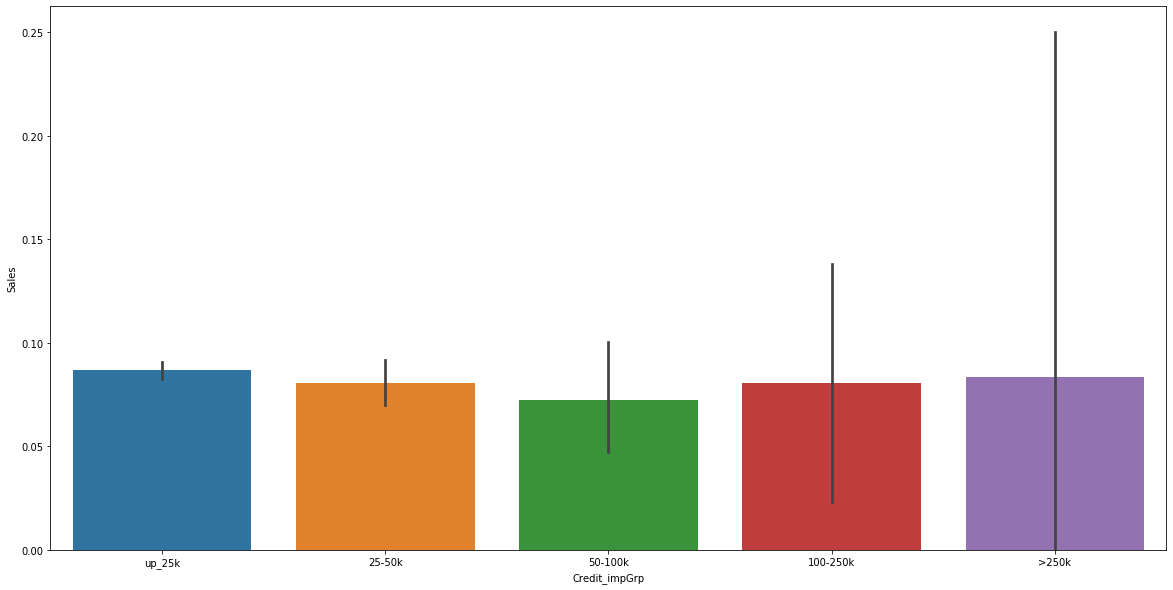

In [150]:
# Plot the distribution new feature House Price_impGrp and Sales
plt.figure(figsize= [20, 10])
sns.barplot(x="Credit_impGrp", y="Sales", data=dataset[0])
plt.show()

In [151]:
# Count unique values
print("Credit_impGrp feature have {} unique values".format(dataset[0]['Credit_impGrp'].nunique()))

Credit_impGrp feature have 5 unique values


In [152]:
# Check the results
pd.crosstab(dataset[0]['Credit_impGrp'], dataset[0]['Sales'])

Sales,0,1
Credit_impGrp,,
up_25k,15778,1498
25-50k,2084,183
50-100k,332,26
100-250k,80,7
>250k,11,1


## Remove variables

In [153]:
dataset[0]

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,HouseInsurance_imp_z,HouseInsurance_impGrp,Income_imp_z,Income_impGrp,PensionPlan_imp_z,PensionPlan_impGrp,Savings_imp_z,Savings_impGrp,Credit_imp_z,Credit_impGrp
0,1,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,...,4.185978,>10k,4.743570,40-60k,4.885910,50-100k,0.000000,up_25k,4.545889,25-50k
1,2,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thursday,...,3.542275,2.5-5k,4.444890,25-40k,4.256173,up_25k,0.000000,up_25k,3.910255,up_25k
2,3,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thursday,...,4.143366,>10k,5.037198,>100k,4.843728,50-100k,11.492843,50-100k,4.503524,25-50k
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,3.904532,7.5-10k,4.800533,60-80k,4.608251,25-50k,0.000000,up_25k,4.266620,up_25k
4,5,0,MOBILE PHONE,0,1992,2,0,0,14.50,Wednesday,...,3.723747,5-7.5k,4.441467,25-40k,5.253169,100-250k,0.000000,up_25k,3.967138,up_25k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Thursday,...,3.718160,5-7.5k,4.693045,40-60k,4.501555,25-50k,10.699951,25-50k,4.158972,up_25k
19996,19997,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Friday,...,3.389727,up_2.5k,4.526461,25-40k,4.336656,up_25k,0.000000,up_25k,3.992047,up_25k
19997,19998,0,FIXED / LAND PHONE,0,2009,4,0,1,14.50,Monday,...,3.815249,5-7.5k,4.712416,40-60k,4.520769,25-50k,10.744591,25-50k,4.178375,up_25k
19998,19999,0,FIXED / LAND PHONE,0,2012,4,0,0,14.50,Monday,...,4.127653,>10k,5.021595,>100k,4.828185,50-100k,11.456902,50-100k,4.487909,25-50k


In [154]:
miss_cols_df0

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [155]:
for d in miss_cols_df0:
    dataset[0].drop([d], axis=1, inplace=True)

In [156]:
for d in miss_cols_df0:
    dataset[1].drop([d], axis=1, inplace=True)

In [157]:
# Check missing values for dataset_0
missing_zero_values_table(dataset[0])

Your selected dataframe has 55 columns and 20000 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [158]:
# Check missing values for dataset_1
missing_zero_values_table(dataset[1])

Your selected dataframe has 48 columns and 10000 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [159]:
other_cols = ['Birthdate','Tenure','yearBuilt']
for i in other_cols:
    dataset[0].drop([i], axis=1, inplace=True)
    dataset[1].drop([i], axis=1, inplace=True)

In [160]:
dataset[0]

,Obs,Sales,PhoneType,Email,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,CodeCategory,...,HouseInsurance_imp_z,HouseInsurance_impGrp,Income_imp_z,Income_impGrp,PensionPlan_imp_z,PensionPlan_impGrp,Savings_imp_z,Savings_impGrp,Credit_imp_z,Credit_impGrp
0,1,0,FIXED / LAND PHONE,0,2,0,0,11.12,Wednesday,Not Interested,...,4.185978,>10k,4.743570,40-60k,4.885910,50-100k,0.000000,up_25k,4.545889,25-50k
1,2,1,MOBILE PHONE,0,2,0,1,11.12,Thursday,Sale,...,3.542275,2.5-5k,4.444890,25-40k,4.256173,up_25k,0.000000,up_25k,3.910255,up_25k
2,3,0,FIXED / LAND PHONE,0,2,0,0,14.50,Thursday,Not Interested,...,4.143366,>10k,5.037198,>100k,4.843728,50-100k,11.492843,50-100k,4.503524,25-50k
3,4,0,MOBILE PHONE,0,2,0,0,14.50,Wednesday,Not Interested,...,3.904532,7.5-10k,4.800533,60-80k,4.608251,25-50k,0.000000,up_25k,4.266620,up_25k
4,5,0,MOBILE PHONE,0,2,0,0,14.50,Wednesday,Not Interested,...,3.723747,5-7.5k,4.441467,25-40k,5.253169,100-250k,0.000000,up_25k,3.967138,up_25k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,FIXED / LAND PHONE,0,2,0,0,14.50,Thursday,Ineligible,...,3.718160,5-7.5k,4.693045,40-60k,4.501555,25-50k,10.699951,25-50k,4.158972,up_25k
19996,19997,0,FIXED / LAND PHONE,0,2,0,0,14.50,Friday,Not Interested,...,3.389727,up_2.5k,4.526461,25-40k,4.336656,up_25k,0.000000,up_25k,3.992047,up_25k
19997,19998,0,FIXED / LAND PHONE,0,4,0,1,14.50,Monday,Not Interested,...,3.815249,5-7.5k,4.712416,40-60k,4.520769,25-50k,10.744591,25-50k,4.178375,up_25k
19998,19999,0,FIXED / LAND PHONE,0,4,0,0,14.50,Monday,Not Interested,...,4.127653,>10k,5.021595,>100k,4.828185,50-100k,11.456902,50-100k,4.487909,25-50k


In [161]:
dataset[1]

,Obs,PhoneType,Email,NumberofCampaigns,ProdActive,ProdBought,Socieconomic Status,Province,Right Address,Living Area (m^2),...,HouseInsurance_imp_z,HouseInsurance_impGrp,Income_imp_z,Income_impGrp,PensionPlan_imp_z,PensionPlan_impGrp,Savings_imp_z,Savings_impGrp,Credit_imp_z,Credit_impGrp
0,1,FIXED / LAND PHONE,0,4,0,0,High,OU,Right,60.4474,...,3.903670,7.5-10k,4.798250,60-80k,4.605191,25-50k,10.933715,50-100k,4.264494,up_25k
1,2,FIXED / LAND PHONE,0,2,0,0,Medium,VA,Right,78.0148,...,3.427856,2.5-5k,4.329758,up_25k,4.140662,up_25k,0.000000,up_25k,3.795200,up_25k
2,3,FIXED / LAND PHONE,0,6,0,1,Low,BU,Right,395.0320,...,4.172924,>10k,5.065787,>100k,4.871785,50-100k,11.110373,50-100k,4.532221,25-50k
3,4,FIXED / LAND PHONE,0,2,0,0,Low,VA,Right,514.2920,...,4.123369,>10k,5.016475,>100k,4.822605,50-100k,12.968331,250-500k,4.482881,25-50k
4,5,MOBILE PHONE,0,2,0,0,Medium,GR,Right,207.1640,...,3.614602,2.5-5k,4.492272,25-40k,4.403785,25-50k,0.000000,up_25k,4.226311,up_25k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,MOBILE PHONE,0,2,0,0,Medium,GR,Right,102.9656,...,3.820611,5-7.5k,4.715972,40-60k,4.523340,25-50k,10.742310,25-50k,4.182129,up_25k
9996,9997,FIXED / LAND PHONE,0,4,0,0,Low,VA,Right,108.3658,...,3.650545,2.5-5k,4.548050,25-40k,4.356586,up_25k,0.000000,up_25k,4.013972,up_25k
9997,9998,MOBILE PHONE,0,2,0,0,Medium,ZA,Right,329.3720,...,4.306673,>10k,4.530314,25-40k,4.505724,25-50k,9.075296,up_25k,3.858735,up_25k
9998,9999,MOBILE PHONE,0,2,0,0,Low,BA,Right,529.0320,...,3.445605,2.5-5k,4.347072,up_25k,4.157742,up_25k,10.856129,50-100k,3.812561,up_25k


## Variables correlation

The `DataFrame.corr()` method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target.

In [162]:
# Show 15 features with most correlation ratio
corr = dataset[0].corr()
print (corr['Sales'].sort_values(ascending=False)[:15], '\n')
print (corr['Sales'].sort_values(ascending=False)[-5:])

Sales                    1.000000
ProdActive               0.503119
ProdBought               0.413297
Email                    0.398181
NumberofCampaigns        0.047722
livingArea_z             0.026483
Premium Offered          0.023216
Living Area (m^2)        0.013269
builtYrs                 0.008170
ADSL                     0.006811
3G Devices               0.004902
builtYrs_z               0.004768
ageYrs                   0.001684
Number of Fixed Lines    0.000056
Obs                     -0.005893
Name: Sales, dtype: float64 

HousePrice_imp_z       -0.023650
PensionPlan_imp_z      -0.023760
HouseInsurance_imp_z   -0.027795
tenureYrs              -0.039253
tenureYrs_z            -0.040290
Name: Sales, dtype: float64


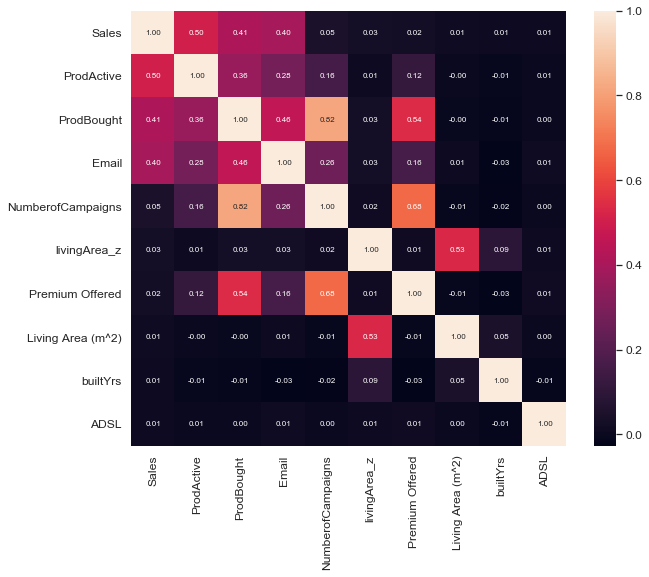

In [163]:
# Sales correlation matrix
k = 10 #number of variables for heatmap
plt.figure(figsize=(10,8))
corrmat = dataset[0].corr()
# picking the top 10 correlated features
cols10 = corrmat.nlargest(k, 'Sales')['Sales'].index
cm = np.corrcoef(dataset[0][cols10].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols10.values, xticklabels=cols10.values)
plt.show()

* * *
## Binarizing categorical variables

We binarize categorical variables before modeling stage, where `m` are binary variable.

## Save Feature Engineering part

To be continued fourth part for numerical variables

In [164]:
# Save dataset0 and dataset1 for next step: Modeling
dataset[0].to_csv('df2c_1.csv', index=False)
dataset[1].to_csv('df2c_2.csv', index=False)

* * *
### Estimated time to achieve 2c Feature Engineering


The 4th has been achieved in `~3 hours`. We made investigation, analysis and transformation tasks.

To be continued with the 5th part,  `3 - Data Visualization, Patterns and Insights`...